In [29]:
import pandas as pd
import dill
import codecs
import pyautogui
import time
import pyperclip
import datetime
from pyperiscope import Scope
from pyperiscope import Pilot

In [30]:
with pd.HDFStore('film_database.h5') as store:
    films = store['films']
    production_co = store['production_company']
    production_co_link = store['production_co_link']
    producers = store['producers']
    producers_link = store['producers_link']

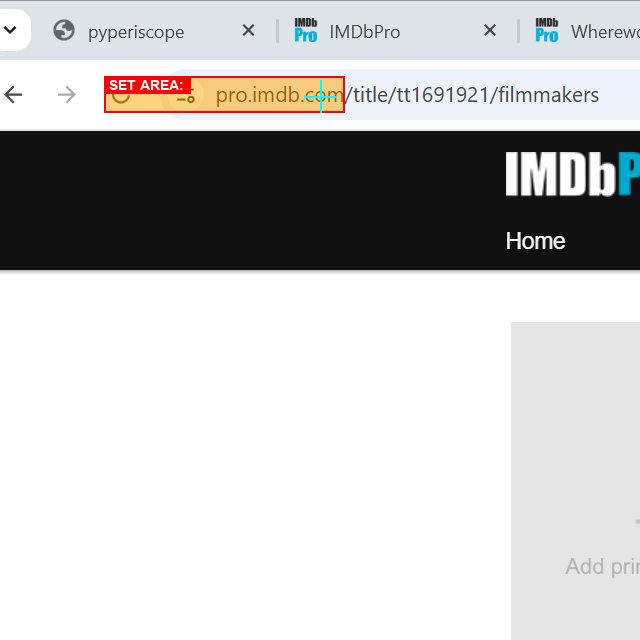

In [31]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVz5YAAAAAAAB9lCiMBGFyZWGUWOARAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBUEFBQUFBa0NBSUFBQUE0bUNEOEFBQU5Ma2xFUVZSNG5PMmNlMUFUOXhiSHoyNWVjR21RS1hIYUFjb2lWb1VLS0ZMa29WYWdDRmlmbzBDUlFzVTZscEhwOVFsU2krQlZydmJpNHlxMFlvR3hGNjlBdFVBNkNpTGxJWXhZS21xYzhxZ1JwY2gwSWkwRmJBMEk3bWF6ZS8rSVlvRGRrRVFDNWs0K3d6Kzd2OWM1OGV0dno1N2Y3N2NJVGROZ3RBeml5a0dDbW13clRMeEVjQ2ZiQVAwaFNHcE1OWE5RaE1kRmVSemdjVkcyT2dxU1VpaEJRVkpLeWtEL3R4R2FwaEhFTUgyYkdBNWlwRE0wcWFUbEE2U0dDaWlDbUF0UUFZOVZ4NlBCRmRRZ1FWSGpKMnNFQVpvQ01FbDVBakZLUVZNMFBIcXNZRE1jUWNDTWg1cnhPWHBNaWpRTlR3amxFd1gxNHI4S0FtQVM4OFJqbElMdUd5QVZTbWF6RVFRc3pEaDg5Z0JER3dpU2V2eEVhWVEvakFsNG9YLzRTWUZVMG14cVJsRkVhTTU5UVRVREFKK0xDczI1cUw1aHJ5bGNua1NNVDlBRHVKTHhQZ0x3aWhtSHl4a2ZOWEU1eUN2bWV2WkZtZkl1azRlUkNab2dLWkpsZXJZWVB6V3I0SElRQ3pPT0hnMU5NL1FrWW1TQ0huakNQRDBMZUNoZmw0U0dsdkI1dXVWSlRFdzZPdVNoQndZR2Z2NzVaNWxNQmdDdnYvNjZzN096bFpXVnFxaXJxNnVpb2dJQW9xT2pEV0RrVXhSS21qR2xoaUR3TndIelZFcVNaR3RySzUvUGQzUjA1SEQwbVc3TkJSeUNISWVraDRtSlFTdEJOelkyRmhZVzNycDFpeG9lSGpvNk9tN1lzTUhUMDdPcnF5cy9QeDhNTEdoQ3dSeWNtck5rNk83ZHV4Y1ZGZFhWMVFVQWRuWjJlWGw1RGc0T3VnNktJbURPNTdBRjdwTU9malZ4K1dheFRYTE42WEM3Y2UrOFBtSEdKK1hMdm13Kzdnc0FJTXRmNFg4VWtrcExZbXpHZmFUeFl3eEIwelNkblozOTNYZmZxUzd0N2UyblRKa3lPRGpZMGRGQmttUjdlM3R5Y25KSVNNaml4WXNOYnlvUUpJT2dPU2hpeG1lSUN2cjcreU1qSTd1N3UxMWNYR1F5bVV3bWk0aUlxSzZ1dHJDdzBIVmNBUi9GRllaYlJ6UXhub3doNkp5Y0hKV2EvZjM5VjYxYTVlVGtwTHBQVVZSalkyTlJVWkZFSWlrdkwyOXFhakswb2FTU09XUE9GdVBtNXVaMmQzZUhob1llT1hJRXgvSHQyN2VYbFpVVkZCUnMyclRweHg5L3ZIYnQydWdtOXZiMmE5ZXVIWDBmQWVCeWtKZFQwSUtGYVpYTmFaTnR4VXVFSmtIWDE5ZUx4V0lBMkxoeFkxaFltSG9SaXFMdTd1N3U3dTY1dWJsbno1N3Q3T3cwckprczB6TUE4TGpNT1FXcFZBb0EvdjcrQUNBUUNJS0Nnc3JLeWxwYVdnRGcyclZyNmVucG81djQrdm95Q2hvQStEd1Vad2w0VEx4VXNBb2F4L0dNakF3QVdMMTY5UWcxQTBCWFY1Y3FOcDAzYjk3Tm16ZmIydG9NYWlVQUtGbXlkUnlVV2RCMmRuWUFVRkZSRVJRVVJOTjBaV1VsQU5qYjJ3T0F0N2MzWXhOVktTTThEb0lnWUhvMWZQbGhGZlNsUzVmKyt1c3ZTMHZMRFJzMmpDNnRxS2hRdlFWT0dMcHFLU3dzN05TcFUrZlBuNitycXlOSlVpNlhDd1NDOFBCd0FQRHg4Zkh4OGRIVkFBNktzS1hBaHpQMDhyU201MHppN3VOVnZ4RUFmRnVQOEtUUEU1ZUlubFhxUEJPOC9CRHNMUDgrdURYeDQ2M2lEbGp6WlhPYXI2cE0vbE5SYWtyV1pXa3ZBUUI4NjFuTC8zNDRhZVUwUytiUnJtNmJ0L21pdzY0YWNiVGQwR1hReVh0SmNIakhubXhKTHdEZk9USTlMMzZoSmZSVUhrbElLYmpaQXdEVy9rbEgveG5qTnJ4TC9FSGx3YTBwMzdmMkVBRDhXY3Zpay9lenZQekptOWo5WXE3L2JjckJ6TXE3VC8xeGp2M3F3Z2Fub1VMTnpqNzdNWXNXM2R5ei9XQzVsQUN3OXQrZmZYamROSUc4NmR1VWcya1g3eElBZk9jVmgwL3RDNWdLR3ZMUWRYVjFBQkFRRUNBUUNEUlpPMUhvbWpsNzg4MDNzN0t5ckt5c0hqNThLSmZMUlNKUmRuYjJHMis4b2JjQk9pNlh5R29TL0dKT3lmMFRNNDhlU2xyaGhFdnk0b0pDYzBkRVprVFQ0ZlZieFIwQUFManFEbjduY01TQ3NJUGwzUTdoKzQrbVozNzJrWmV3VmZ5UGxYNmZYcFZyUDNaZmVlS2FQUTJ6NGpJLzM3WE1nWkFXYkY2WmNhUHkwNVZ4TmNMWXo5T1A3ZlMzN2EwNUVMTzF1RWU5eWRYRTVTRnhKYTJXZnJ1T0hVM2ZIeW1TSG95S3lyaWpwMS9Qa1RjY0NQYUlTYjNZTzIzZForbVpSdzhsaFRwQjU3T0J0WGIycDZ3UFZ1YkNtbjNwK3lQZFJMMDFLV3UzRmplZGlZbzVMbnM3TWZObzhucFhnYlJrYS9DQlJnQUFvRmtJRHc4UERnNnVxNnRqcXpEQlBPd2pldVVNZjVwYktSU0tscGFXdTNmdmtpVDVnZ2IwRDVLTUJvejZhODlZakdFWU5pUDJZc2Z6bTMwMVNiNFlocTAvMTZlNjAzekNIOFA4RnkvMldQOWZhZWZ6YXRkM3VHQ1lTMXlKVEsxRFdkME9Id3pETmhaME13MVhGb2RoMk9JVDdlcVgySXk0b3FFZXJoL3d4akFNdzd6My9mU3NWVTlCSklaaC9obFNUZU4ybE1YTnhqQU1peXZSeGEvaGY2cUJYRGFWOVRDVmF1UHMwMEVYSDVNTzd4UERzS2lDRVQ3R1Z2WEtDZFladXIrL0h3RDBTSElaQ1AzaVZ5NlhPM3YyN0Jrelp1aTNxcUlPeWhLc3N6QW5QbkdKOFBtbHdHMWJ2QTlBN2VVcmFuWGFPejJQLzN2MTlLRW5JSDRwcTdnUC9KTFRmTldEQVV1ditHMkJBRlVYTHVOYWptMGQ5YkgvVUE5T3k0S3RBV0RSbHJpM2hucjBXN1VJb0wzNXZxWnhoUXVUdHJqcDU5Y3pIb2l6ZmdCKzJNbC9MV1NJbDNSeGRsRnMxUFRoeG9QMVIvSEJJM3k4MDk2cEllUVFDb1VBSUpkcjlhUzdjdVZLUWtKQ2FtcXFOcFgxdzBBYkpKUktwVlFxYld0clV5ckhXRHJSYmVPL3RaZnJpTGhTTU5mWEFlRE9BL1duczErQWwzcVYxaHRYQU9iN2VZNk04UVJ1WGpNQkpEZWtXZzd1TWVjdHRTdExheUdBZzlkTXRWNEZ3bUVLWXhsM3FzM29JRm83djFUZ1RWYzZBSUtIK3pqV29Fek9NaG5QNENNQWFCQzByYTB0QU55K2ZadXRnanBWVlZYTnpjMS8vdm1uTnBYMVErL05uQnFvcnE3Mjh2SmF1blJwWUdDZ2o0OVBiVzJ0aHNxNkJmSENxY0t4S3ptNlRodDIzZDlIQUV3VmpYN0RzblYwQUNENnRBNmorYU52YVhvVFloMTNORnI1OVpUZW5nY0Fqak9uTVpmcTRpeVQ4UXcrQW1nUXRMdTdPd0RVMU5UZytCaFBPb1ZDY2V2V0xRRHc4UERRWFBORjBPMkJyd1h0N2UyYk4yL3U2ZWx4Y1hHeHNyTDY0NDgvWW1OamYvMzFWN2I2TDd3cHRLZWpFMER6QzdZQUFMcDdla2JkNytudUJiQzIwVVp4ZWlQdjB6YWlHWUVHdndRQXNvN1I3Z3dWR3NCWlZrR0hoSVNnS0NxWHkwK2ZQcTI1aXhNblRwQWt5ZVB4Z29PRDlUTkNHM1FNWVFFQUNnc0xqekhSME5BQUFHZlBuaVVJSWl3c3JMUzB0S0doNGIzMzNzTnh2TEN3a0swMzNXYm9qaXZOSS9SeHY3S2VBT3NGOHpWc2hKajU5bnlBNjdVM1Jpb0x2MUVsQVhCMW1zN1k2c1Z4Y0hNR2FMZzVjclczb2VieXFLcTYrR1hqTm9jUFJQM2xYeGdITlpDenJJSVdpVVR2di84K0FJakY0cHljSE1ZUWs2S29uSnljOHZKeUFJaU5qUlZwOWREU0U3YTl6aHB5dzBWRlJlbE1YTDkrSFFCVWszRkFRQUFBQ0FTQ0pVdVdETjBjallKbDRaMmR1b3kwaHI3bmw3L2tKMlQvQm80eDRXK3hOd0hSMHRnZ1B0U21KdGFyUDIvbERVZU9WNEV3SW1hcG9mS25Oa3ZYdVFKUm5KWjdYKzNtL1RNSGlvblJkWFh4YTA1TXBBMzg5dlgyLzl4bm1Qd041S3ltcGUvbzZPaVdscGJtNXViaTRtS0pSQkliR3p0NzltdytudzhBTkUxTEpKTDgvSHpWQ3JPdnIrL3k1Y3YxczBCTGVGd1VnT0UvRlVGU1hKWU1SbWhvS09PaTRQejU4d0ZBbFpPdXJLd01EQXlrS0txcXFnb0FIQjBkR2J0aTIrakhpc015MTZhb05SK3NpWWtLdE9scktNZzhMZW1GbWJzeVA3RFYyRXJ3VGxMNkdzbG04U2NMR2p5aXRrUjZpbm9idnluS3E3dExPTys4a1BvMDVmRGdtL1VoS2MxdSswdnoxNDNicmpmUnVuL3MrbWJ0b1FOci9VcFhiSXp4RS9YVTVtV1YzQTljR3lJdExoL2gxNkpaTnpUNGhkZnY4ZnZrUEt3NFdidHZvUUJnK3BhdmtpUXJEM3l4Y3Q3M0MySkN3K2RhNHc4azU4VjQxSVdraGRvNXF6dWFCSTJpNk42OWUxTlNVbTdmdnQzUjBiRjc5MjRBY0hCd0VBcUYzZDNkdi8vK3U2cWFwNmRuZkh5OHZnWm9DNG9BaWpJRXNnUkpzVzJHSHIxaXI4NkhIMzU0N3R3NXNWaGNXMXVyV2twODlkVlhJeUlpR0NzcldIYVNzRE4zeTljeE5YdTJmYkZMVEFEd2JlWkhwaCtQRDVnNlpqUGh3clRTOHNBdjloeTVrSmV5TXc4QWhETkQ5dWNtcjNOaldTZ2NMNlpGRjViYXB1ellJeTQ1dEwwRWhETkRFbkpQcnV0UFBWczhzdUk3OGZsYmRQQnJXc3pwSCtZV3BhWmtsR2NmL0FFQStOYXpsc1EvZTAwMGhMTmpuL29tQ0tLd3NMQzR1SGhnWUdCRWtVZ2tpbzZPTm1qb3JNNEFybnpDOUdVWkN6T09mdWRLWkRMWjNyMTdxNnVyQWVEZGQ5OU5UVTIxWWNoVUFhNmdIck9jbEdIczFTajJEZisvb3UxbkRCUUtoVVFpYVd0clU5VkhVZFRGeGNYVjFSVkZKKzZFa2tKSjl6RjlYQVpGa0NtdnNHeTYwNEx1N202S29sNTc3VFhHVWhyZ1ViOU9SMVpNZ3A1TXREMkN4ZVB4dkwyOTJmYXBUUXc4bHZkQ2lxWnhnbUxjNXE4TlU2ZHFpZ1J3Z2pJZHdESWlqT3dFS05zeDdFRmNxZDFXT04wZ2xmVGd5M3I0eWdRalJpWm9BWTg1SDAwRDlBMlM0M3VvUkVuUmZZT2thWEkyTG96dlUyQUVTZlVQTXMrYUtJSllXbkRHWlpGY1NkRjlBMG85Z3czVFdZREp3L2dFRFFDUEhyTk94dVB6YlRzRjlmaUpBU0lZRTRiSEtBVk5VZkRvc1VLRDNRSWVhaTVBOVppcUtab2V4S2x4T1Q1b21xWW5CYU1VTkxDbjhJWkFFRERubzJaOEhiWkJQeUdvUVdLY1B6cEswelJpK2pUWUJHS3NnZ2J0MWpzNEtNTG5Jbnd1eW1ILzdKMVNTUk1rUlpDMG9UNVVvUHFGVGJLZUVQNEhveGNSczBMYUwzd0FBQUFBU1VWT1JLNUNZSUk9lIwNY2xlYW5fcHJldmlld5RYCIQAAGlWQk9SdzBLR2dvQUFBQU5TVWhFVWdBQUFvQUFBQUtBQ0FJQUFBQ0RyMTUwQUFCaXpFbEVRVlI0bk8zZGQzd1VaZjRIOE8vTTltVFROd0ZDa1JaQ2tTSllxQUZVRkFSQkJUeEVRUlFyM2lraXlIbDRXRTVFUURqUWt4T0ZFeXpJN3dRVVJPQkVwRWtBRmFSSUlFV0tFQ0RKcG00dk0vUDc0NEZsMld3Mm01RGtDZWJ6ZnZueVJXWm5aNTdOUHRuUFBtV2VFWllzL1lnQUFBQ2diZ20vbmNualhRWUFBSUFHUitSZEFBQUFnSVlJQVF3QUFNQUJBaGdBQUlBREJEQUFBQUFIQ0dBQUFBQU9FTUFBQUFBY0lJQUJBQUE0RU1xc0RxMUdwVktKS2xFVUJLSFNKeWlLSWtteUpNdHVqOWZ1ZER0Y0hsbVdhN3hVUkVRa0t5UUlpa0tDYnd0QUxWRklJVVVRaUJSUkVCV0ZpSlNhUGdWcU5kUWxWT2xyZ0tBb1YvV3VLRVJsRm51eHhTYkxOZkR1Q2tTS1FvcUF0eEY0WWg5V2dsZ3pIMW1vMWNBZHFuVDlkTFVCekVpU1hGaHF0ZHFkVjFjV2dXUUZieW5VRndvSklsM3Qzd2RxTmRRZnFOTDFUTTBFTUZOWVlpMjEycXRka2xyb0lRRzRhbGRWTVZHcm9mNUJsYTQzYWpLQWlhalVhaThzc1ZiMVdZcENZWXcrQTNDaVZHZHNDN1VhNmk5VTZmcWhobWRCeHhnallvd1JWWHVPZ0RjVjZqZWg2cDlXcU5WUW42RksxdzgxZnhsU1FxelJvTmVHdXpmNk0rQ2FVS1V4TDlScXFQOVFwZXVCV3JrT09Da3VPcHdybW9nRXF2RXJtQUJxaDZKUWVLMEcxR3E0TnFCS2MxY3JBYXhTaWRHUmhzcjNxMFkzQ0FBdkFwRVFSaXNBdFJxdUZhalN2S2xyNmJpeFVSR1Z6NGl1MWx4MldaWkZNZmozaGhBUEFkUUFPWXhQb3NwcWRhSFpQR1A2bE45UG4zcjZMNU4zYmQ5MjlOZkRzWEZ4TDczODJvZnZ2M2ZpdDJ5dFZqdGwrb3gzNXMrMVdNb0VRWWlKalgzNno1TVRrNUttL09YcHhrMmF2UFgyb3ZnRWt5aUtxT2RRTTFDbHVhcXRBRmFwUkoxVzQzSjdLdHBCSUZLcW1MNktvZ2lDSUlxaTNXSFBQcDVwc1ZyWURHNVJJS014S3FWOWFvUWh3cmZiVlpVZUlDamhpckd3RXZNRmo4dWgwUmxpVFkwdlBWNjFXczNxcXRQcHpNbzg3bmE3RkVWUmlBUVNGRVVSUmZIR20yLzUrY2Q5cXo3NytNSHhqd3FDb0NoS3BERktyYTZ0djFsb2lGQ2x1YXJGVng1cDBJVUlZS1dLRStIWisycTFXcjdmK3YyNWM3bjVlWGs2blY2bFZna2tTSkxYN1hiSHB5YzBhOWI4MXR0dU5ScWprTUZRUy96cnJkdHA5LzIvL0tOaEhrMVJGSWZkZnZ4NGh0dnRsbVZaOE5zK2FQRFFRNzhjc050dExwZERwVko1UGQ3Rjd5ekl5N3N3L0o2UmFRTnVyY0VYQlEwWnFqUkh0UmpBZXEwbXhLTlZlbGRab1A1NjVQQ21qUnRkTHBkYXJkRnFkYklzNjlWNkVraVNKRVZSaWdvTGk0dUtNbzhmRzNMWFhkZDM3b0lNaHRvUXV0NVc5ZXBLZGhWK1JHUms1ckVNajhkdE5FWjVQQjY2MkN3aGg5MU9STEtzeUxJaWlpcUgwM0V1OTJ4MlZxYlQ0ZWg2US9lWW1OaXJlQjBBRjZGS2MxU0wzZTRxVmFpRGgvK215cklpQ01LZTlOMWZmZm1sdytrVVJURXgwZFF2TGUyK2thTWVHRHYyd1FjZmF0Njh1VXFsWWgwYURxZnpxeSsvM0pPK1d4Q0VHbG1lR3NCZjZIcGIxVzk4c2l3cml0SzhlWXVDL0R5MVdoTWRFeU5Ka2lBSUNpbEVKQWdDcTlWRTVQVjZUS2JFNGZlT1pNK1NKVXhMaFpxQktzMVJMYmFBVmFFSDFjTmJ5VnRSRkZFVWp2NTZkUHUyYlVRa0NrSmEvLzdkYjd5UkRmY1NrZDFoTHlrdFVTNFJpQVJCMkw1dFczUjBiS2ZyTzZFZEREVXNkTDJ0NHZyMHJISTJiZDRpT3lzenVXblRvc0pDRWtoUkZJRUVRUkJVS3BYL3pySXMyKzBPV1paUnBhRW1vVXJ6VTRzdFlGRU0rVHNON3hjdUNJTFZhdDJ3WWIwa1NhS291bmZreUw3OTBpSU1FVjZ2MSs2dzc5eXg0L05QUHl2SXovZDZ2Yklzc3k5ZmtpUjV2ZDRORzlaYnJkWUcrNzdDL3paKy9jV3FUNE0rOU1XcVQzZHUyMXJONDlaUWUwRVFCRGIxUmFQUk5tdldYS1ZTSlRkdHB0Rm8yS2NkYXlpVWxwWW9pdUs3VmFoR296RWFqYXdCVVF2M0FLMit6MVlzbS9uU0M3eEw4Y2RYVkdoZU1HZldoZlBueWo5MDRmeTVCWE5tV2NwS3EzUGNCbENsWjc0MDliTVZ5MnJ2K05WV3I2ZWZTYktzRXNYdDI3NzN1TjJpS0tiMVQrdlU2WHIyUHFuVjZsMDdkL3o0NDQ4dXA5UFhyZUdMVzBWUnZGN1A5dSsvSHpaOE9Ec0kxOWRSTlVXRjVwZW5UK25Uci8rREQwL2tYWlpyVlZibXNYVnJ2MkQvSGozbUlmK0h2bGoxNmJidnZpV2lKazJicHJSclgvZGxVMGh4dXR3a2loNUpzanNjYnE4MzNwU29FRFZxMVBqWHc0YzhIcmNzU3c2blE1Ymx6MVo4NVBWNm82SmpORnFkSkVsbnoveStZZDJYZ2lCb05GcWRYaC9tNldhKzlFSnErNDZzTHJHcVJVUnZ6RmtRbjJBcXYzTk9WdWFDdWJOU08zUjg3b1cvK3A1dUxpanczOGYvMFRCOXRtTFo3bDA3L0xkTWVYRkcyM2FwVlRvSXJGajJRVTUyNWovbnZmbjh0TDgxYnBMczIzN2gvTGwvem52VFVsYjJudy8vWGRXM3BrYlVaWlZtZFdueDBvLzlOK1prWnk2WU0ydkNZMC9kM0xPM2IyTnhVZEdNRnljUHYzZlU0S0hEYS9nRjE1d3JBdmlubjM1YXZIangrKysvcjlQcEF2Wnp1VnhQUGZYVXBFbVRicnJwcGpvcm5DZ0lWcXZsNU1tVEdvMDJNZEYwUzg5ZXJMTkNFQVNIdzU2VG5TM0xzaWhlSE91OU9MUWdFQ25zdTVodzRzUnZWcXNsTXRKWVp3V0dlcUpkYW9lNzdyNW40OWRmc2F6MVpiQXZmZSs2K3g0dTZVdEVCcDMrMWo2OUNpNWM2TlNxdFdIUUhma0ZlVjA2ZEx6MTlqczdkK3RPUlBuNWVVMlNtdzY5ZTRUTDZaUmxSYVBSRExqMTlzU2twRHNHM3hVVkhXTXV5Ry9kTm1YWWlIdU54cXVxMVh2MzdMNXIySWp5MjcvNStzdnlHd08rQ3k2YS85YWt4OFlQdTJkazBDTlV4SlNZK1BycytlemZHemVzV3pCMzFzTVRuN3lsVjU4cUZyeEJHLy9vNC8rY043dW8wTHp3N2RuVFhwcVpZRW9rb2d2bnp5MThlN2FsckN6QmxQZ1FwNi9zZFZtbFUxSTc3TjYxSXljN3MyM0s1Uzl3T1ZtWlJMUTNmWmQvQUdkbkhTZWlldjQ5NzNJQVoyWm1qaHMzenVsMFB2TElJeDk5OUpGL0JqdWR6a2NmZlRROVBYM3YzcjFmZmZWVmFtb2R2U1JCRUhLeWZ5c3RMVldyVktrZE9tZzBHcS9YeTBZUlBCNnZKTXV5SktsRU5aRWtTZExGNXloRVJJcWl5TEpVWmluTHljN3Bkc01OZFZQYW1oS2ZZQXI0ZmdmVk1HekVmVVRrbjhIKzZjc2U1VUliYWV3eGZwSkRKaXRSbzNaZEd4RzUxZUxrRjE0a29vNGRPN0Y5MnJSTkNYalc1S2tYV3phU0pBVU1wRldWS1RGeHcxZHJ5c2RuVWFFNTgxaUdLVEV4OU5PZmUrR3YrL2JzWHJGc1NidDI3YXYzNlhiWHNCSEZoZVp2MXE5RkFGZEpnaW54K1drdlhjcmd0eVpQL2F2SDQxbjQ5dXl5MHRJRVUrTGtxWDlsa1Z6MzZySkszOXl6OS9LbDcrZGtYUkhBNlQvc0pLTGpHVWY5OTh6T1BFWkUvcnZWUTVmN1p0dTBhZE92WHo4aVNrOVBmK1NSUjF3dUY5dnVjcmxZK2hKUjM3NTkyN1JwVTVmbHM5a3NHclZHbHVXa3hDUWlVcXZWcko4NU1pTHl6c0ZEN3IxdjVLalJvd2ZlZXF0V3F4VXZFNGhJRUVXdFJtZXhXT3F5dEZDdkRCdHgzNkRCUTRsbzIzZmZ2dm5heS9VaGZZbW95S3M4bFZYNnAvUHErMCs2UjUveWpqN2xIWDIwOE84blNzczhNbDI2aXNQZnBmbUZKQ3NLRVYxbCtoSlJ6ejVwUkxSdnorNkE3WnMyckRNbEpxYTI3MWpwRVc3cDFTZTFROGVnemVVd3hTV1lBbnEySVJ3c2crTVRUSVhtZ2dWelppMlkreWIzOUtVNnI5THRPM1ppaWNzVUZ4V1pDL0tIM3p1S2lIS3lNMzNiTTQ4ZjY5T3ZmN1ZmVk4yNDNBSldxOVZMbGl6NTg1Ly92SEhqUnBiQnk1Y3ZWeFRsa1VjZVllbDcxMTEzL2V0Zi82cmpCY05rV1ZhcjFUcTlMaUl5MHV2eHlJb3NDcUlpQ0dxVnFsV3JWbXlmMW0zYkhqbDh1S1Mwek90eEV3a3FsZHBnMENpeVFvSlFwWnNkZjdaaVdlYnhqTmRuejUvMDJIamZSdFlZWldOakFaMW1HemVzMi9EVm1zVkxQMllOZ2pmbUxQaGsrZExNWXhuczBZQlJMbllFOW0vL1VUVGZjOW5nSER0RlFCZmZvdmx2K1E3cnY5My9tT1Ezc09jYjZtUDhpODBlZW5qaWs0V0Y1ZzFmclNsL1RLYjhiK0FhZGUrb1AzbTlubTNmZlh2MnpPK0tvdHd4WkJqZjlDVWlrU2hPTFJiWVNrV1BSeUZGVnNoTXROSnQ3RmprdWo5Skw4bUtLSkJhRkJSMisxVlNKQ0sxSUJDUlFJS3NrS0lvcXREVEd5dVRrR0RxMDY5LytRYm83bDA3SHA3NDVONzBYZUVjSkNXMWc2LysrRlN2MnJCUjZyZ0UwNGF2MXZqM1ZQc1BQMk5LaEEvTDRBVnpaaFVYRnhGUlhGdzgzL1NsT3EvUzdWSTdITTg0V2x4VUZCY2ZUNWU2bWdjUEhiNyt5OVcrbGpGTDVZQS9kalpVelA1ZGZtdzRhTzFsQThrVEhudHFiL3F1NHhsSGZmWFEvMUR0TzNaNmRzcDB1cGdneDE2Zi9iYi9jLzFQOU02Q09VVEVkaWFpbVM5TnZXSU1XQlRGOTk1Nzc2OS8vZXYvL2QvL3BhZW5QL25ra3g2UGg2WHZtREZqWnMrZVhmZVRpbVdGWkZsMldwMHJQdnJJdDFHdFZzZkV4RFJyM3F4Nzl4NU5rcE5GVVJ3NmJQak9uZHRLU2tvRkVwSWFOV3Jmb2NPT2JkKzdYRzRobktYR3J6VHBzZkcrM3o0YjdscTg5T08yN1ZKVE8zVGNtNzdML3pOcjcrNmR3KzRaNmZ0eDRkdXp4ei95QkV0V05zcmx5MkNXc3I0Zlo3NzB3cUw1Yi9sUGwxajQ5dXlLNXNYTWZPbUZCRk1pSzFKUm9YbnZwWVlMaTMvZk1UZHVXTWUyczNQNVFwZUZkRTdXY2YvUHIyL1dyKzNaSjgzL3V3VVJzUXhtQ2UyTDVNOVdMUFAvaFZ5TDFHb05tNkJYVDZiRUswUmVXZkc0UFlJaDhsNmoxNlFTbCtVN0JaZjlpRTE1UURDb1ZCY0xLUkM3L2FyQS9rUXRYbGxXS0VZamtpQlU2MmJxVjdpbFY5L2R1M2JrWkdYNnZpT3krbk5Mcno1aEJuQzdkdTJKcUtqUTdLdTBRZjl3S25wNmR1YXgxQTZYbTlxWnh6TlMyM2YwN2UrYmgvajY3SW0rZzdNdngxVjZtWDlnNVp1VkhOVnhsV2FWTmp2ck9Cdnh6YzQ4MXI1akp5SnEzN0ZUVnVZeGxuWXNsZjNuZWV6ZXRhT3cwTXpxMk9adjFxLy9jblhiZHFtK3RQWlB5dklmZWh2V3JSMDI0ajVmY1A2NE4zMzUwdmVuVEovQm5qN3pwYW52TEpqejdKVHB0L1R1dTN2WGpvQnZCcjRpRWRIeGpLTVRIbnZLZDhZKy9mb0hObWNGUVhqcnJiZnV2LzkrSXRxMmJkc1BQL3hBUkE4OTlCQ1g5Q1VpOGVKVjI0ckg0NUVrTC92UDVYTG01K2NkT25SbzVXZWZuanQzVGhDRTVpMmFQL2pRK0VjblRoei84TU9qUm84MjZBMGxKYVVlajZlcTdYVnpRY0dVRjJmNGZ2U2xLUkgxN04wdjgxaEdVYUdaUFpTVGxXa3VLT2pwbDhjOSs2VDVQczd1R2piQ3Y0OXV4Yklsdys0WjZYdDAvQ05QWkI3TFlCTUhtS0hEN3d1YXZxeElQWHYzWS8rT1R6Q3hYTXpKeXR6dzFacUhKejdwZjBaMkJIWXUzeGVGdHUxU0g1NzQ1TzVkTzN3bEo2SUVVNkt2eWR1MlhlcXdlMGI2V2pPZkxGK2EycUdqNzFFVzI3NTB2K1pzV0xkMnkrWnZCRUZvMXJ3RkVXM1ovTTJHZFd0NUY0b3RzS3VRU3BXb0ZtK1AxMGxlcnlUTE5vbDJsTGpXNWp1K0xyRExpbUoyU1lldGJwZFgvdlNDYmNvSnk4VE0wa2N6aTE4OWFmblY2cm42djhPMjdWSk5pWW43OXZ6ZzJ4THdiYktxUXZ6aGxQZlppbVdaeHpMR1RYak1mNlAvRjBSV0NmMjN2REZuZ2JtZ29IeTNlUU5VYUM3NDU3elpKU1hGY1hIeGtjYW80dUtpaFcrL1ZXam0zWjlmaDFXNmJVcXFLVEdKRGZFUzBlNWRPOXFsZHFCTExXTzJNVHZ6bUNreGlRVWhZMHBNOGlYbzRLSERUWWxKKzlJdjF2OVBsbi9Zdm1NblgweXlpcmY1bS9XKzU2YTI3K0Evdld2NTB2ZUgzenZLTjdvOC90SEhqMmNjOWMwTDgvMVo3VTNmMWFkZmYxK1JXUGM0KzA3QXp2amd3eE9ENUpNZ0NIUG56bjNvb1lzVFJ4OTk5TkUzM25pRFYrc2hLaXJLN1haSmtpUUl2cEVEdHI0M0tiTGtjcmwyN2R4SlJKSXN5N0pzTUVSRUdvMlNKRjI0Y0Y0VVJZL1hFeGtaVmFYVG1SSVRBK2FWcEhib1dGeG9KaUlXYWI0RzZMNDlQNlIyNk9pZm1qMnY3TkJMU2UzQS9pcFkwUG8veWs1UjZKZUlLUlZQWmpFbEpxNVl0c1EvUG9rb0srdTRLVEd4L0J5Vzh1ZnlIVHpiTCs5OWljNzRXak5FbEhrc0krQlIzMi9nbXJOaDNkcU5YMzlGUkFOdnYrTnZyN3d4OFBZN2lHamoxMS94ejJBMlZaQVVnY2lyS0NTSWlpeDdGZVh0M3kzVGN0MHZuckMrY3Fyc2daUHVkUVhPR2Fjc3IrVFRPcHRxdjEwKzZCUStzYW9meWJGdUwzWmRmUkdHRHIvUDk3VnMzNTdkQWQ4bUsxVjRaWlVJOFlmRG1Bc0tKajAybnYyWGVUeGo4ZEtQL2Y5MkFnYWV5MWZDK0FTVEtURXhKK3Q0K0NYOFEyTHBXMVJvVGpBbFRways0NFhwTTZKallnck5CZnd6dUc2cmRHcjdEcG5IajlHbFZMdWxWMS9mLzltV3pPUEhVdHQzQ0hpSy80LytrdzJQWnh3TnFHL3RPM2J5LzMybXBGNStydjhaR1phN1JZV0ZkS2tWN2p2c1hYZmZTMFEvN2swbm9weXN6UFlkTzdIdkJMNHpWbmdkOEJ0dnZCRVRFeU1Jd3RTcFV5di9mZFFPUlZIYXByU05qbzYyV0t5eUxQbjN1ckJscjBTVldGaFk2UEY0TlJvMVc0SkRFQVJabGpPUEh4TkYwUmhsYkp2U3BnWVh3K3JUcjM5MjVqRWFOb0l1RFppRjh5ejJVZVUvS091L3ZWS3Z6NTYvYVA1YjdPbStudUdLRWpIb01TdHFXNWZIUG81WExGdXlZdG1TS3g3b1VQbkVuUHJHUDMzWlpVanMvOXUrKzVadDV6a1lMQkNKb3VCMkg3VktaMXlTS0FxQ0lPZ0VSUlFFVVpZa1JWbFo0S2JZbU1GcTcvOFZPRldpcEpLOWMxdEhiU2wyYjdGN2kwVGRmd3NjYWJHNnF4c0lwbHQ2OVZteGJBbTdIb2w5VlErL25oQlJZYUhabEpnWS9sUDhCM2RESzZxZ2J2TWQ1cXdQZk9rYkhSUGpHL2VkUFBXbGhXL1BaaG5NY3pDNGJxczB1eGlwdUtnb0p5dlQxOUtOaTQ4M0pTYmxaR1VtSkNTYUMvTEhQL3A0NklPd1Q4dmlvaUlpV3I3MC9lVkwzL2QvdFAybCtkc0JXTkRPZUhGeXVlMW1JdXJadXg4N3pvOTcwMW5jc3RTNHVXZnY5QjkyOXU2YjVqc2pFMm9oam1uVHBvVitBYlZOVmhTak1hcDE2emFIRGg4TVNGOVJwUkpWS3EvSEs0cUNKTXVhaXpkc0VFVlJTTi85dzRVTEYyUlpidFdxazlFWUpjbXk2aW9DdU5CY1lMcFVwMi9wMVhmQjNGbEZoV2JXbWd4OUVZVXZJeE1TVEZUeDBnZmhZQjE2YkhDM3VOQWNZalpLUXJCVFZQU0o1dU9MYlZiQ1A4QUZtbG1aeHdMU2wvSFA0SGJ0TzdSTDdWRFJFV3JQeGNGb2xVcmxjdXlTdGVRU1NDRXlSRjV2OUp4eE9ka2w3VnBGNmFjVWk2UmhjeUFVV1dtaVZSdFZiamNKb3R0WklDcGxYaWxXYzdYVG9kblFRN3QyN1RPUFpRejE2MEFPeDk3ZE85bHM2b3I0LytGVVNVVi9KdFUrNEIvR3gvLzVzS2pRSEJVZFBYbnFTNzZnYmR3a2VmTFVsLzQ1NzgxQ2M4SEgvL253K1JmL1Z2Y0ZxL3NxelM1R3lzNDZucFY1UlVzM3RYMkg5Qjkyc2lvVTVnVklMTHdERnZFSUlUNGhnWWhtelYzbzM3L3R3M3FZYzdJenN6T1BzWStYbE5RT0c5YXRaWlBDV0x2Wi80bjFlb2tvdG9KVi80RUQxV3FOZnl0V0ZNVWJ1dDN3Nk1USEpqNzIyTWhSbzlVcWxTUko3QUtrbzBlUDd0eXhVNVpsalZZN1lPQ3RWT21TMUZjeUZ4VDR4eFViNlBYMU5yQ1JzNzE3ZHU5TjMxVit3TXkvajVlSWR1L2F3VDZoMkJzVzhHZzEzTktyVDU5Ky9UT1BaeERSTGIzNm1nc0tjc29kazNVRDdyMXlxS3o4MTRXQXJyeTk2YnQ4M2VsL2pJNitkcWtkUnR3M09pQjltZEZqSHVyVkoyM0VmYU81cEM5ZDdMeTUrSVZSSzNtaXZNNU9FYXJub3ozM0owVjRaRVZSQkVWUnByV0lmQ2NsTmw0dHVraFFaRmtoOHBLaXlDU0lvaXhMZGtseDE4U3lmYXpQK2VPUFBranQwTEZLVi9SK3RtS1p1YURBZitaODZEK2NxbUlUSHYyM0ZCV2FyK2FBZnd3UFQzeWliVXBxd0RKWVJOUzRTZkx6MC83V3NsWHJoeWMrd2FWZ1hLcDArNDZkc2pPUEhjODQ2dDgvbkpMYXdWeVF2emQ5VjBYdDE2RDhSNVFybFpDUVNKY21XSlVYRngvZnZtT25uS3pNM2J0MnNPcWEwcTY5dVNCLzM1NGYvTWVrMjNmc3hHcDRMUVp3NkpzUmhUbUxUMUdVcUtpb1ljT0dxOVZxZHNzakloSkYwV1JLYk55NGNYTFRwb21KaVdxMVNxVlMyUjMySDNidC9ITE5hbG1XVkNyVnNHSERqVVpqTmVZS0xueDd0dS9mYkZrKy84K21ubjNTOXU3ZW1Ya3NvL3lBbWY5STdhTDViOUdsZWNYeENhWmg5NHhjc1d5SmYxNkd1WFp1VWFIWmZ3bFRObG1VaU5pc2JOWWNadzl0M0xDTy9aczFhM3pUVlhLeU10bTBMUC9EN3Q2MVk1L2ZiT3JNWXhsRDc3NlgvVGora1NkMjc5cmhQMzFtMGZ5M0ttMUQxME4zM25WMytmUmx4ajN5MkoxMzNWM040NGFzVUZXb2I1SWtSMFNOU2pUczYyNWEzU251ejAwampDcnlLZ3FSb2hHRlhqRTZ2U2lRUW9KQXBGeTZJYm9nS0RLUm9zaVZsQ0pjOFFtbVB2MzYrOC95Qzhla3g4YVhYd3VRS3Z2RHFaS2hkOStiZVN6RHYrYS9QSDNLMVJ6d2p5RSt3VFJsK295QTlHVWFOMGwrY2NhcjFleGp1emFyZEx2VURteDlVLytwenV6Znh6T09WdW5yOWZoSEg5KzlhNGYvckt0M0Zzeng3eWoyRnhjZlAvemVVY3VYdnU5L3pmSE1seTRQMUxaTDdaRCt3MDcvanZIMkhUdXQvM0sxZjB2OXJydnZPWjV4OUxNVnkycHhMV2dwNU9MYVlYWUtzN3NLZHJxK1UxbFp5ZGJ2dmxNdVhiWDkyMjg1Y2ZGeDhYR3hpaUNVRkJVWG1NM0hqMlhrNWVYSmlpSUt3b0NCQXp0ZDMwbVdsVXB1Q0ZHT0tURngvQ05QK0M0SUszLzE0VjNEUm16NGFrM0E5Q3ZHZHkwdk80Ny9KeFJMWXY5cmRxZUUxK01YbjJEYXZXdUhieDFkLy9JODk4SmZOMjVZNTM5R2RwYTdobzFvMTY3OWdybXpmT080NWRmZFpaZDcrbmJ3N3g1djJ5NTF5b3N6RnN5ZDVYK1ZjTFU3ei8rQVFsNHhFVTV0dTl4Y0lGSUxnazRsWHJ3N202d0lnc0F1MUdBWFI1SjQ4ZElONWZMSG9FSWtxR3B1U3VRdHZmcG1IczhJUGVMZ1h3T3BnaEdLU3Y5d3FxUnR1OVRGU3o5bVNjKzJWSFhsUzZpQ2E3TktzODgwMzdRbWhxWGQ4WXlqVmZxdTFqWWxkY3IwR1F2bXpGci81V3EyWmZpOW80TDJNRE5zdnJUdk9tQWltakw5OHVmNUxiMzZydjl5TlZzWWhHSFRzMi9wZmNXOExWYkRoZHE3bnN6cDhwd3JLSzdvVWFVcXQ3bGlFNmwrUFhKNDA4YU5icmVidmQ4YXRTb2lNbEpSRkx2ZHdkNCtyOWVqMCttRzNIWFg5WjI3VkdQdWxXOGhqaEQ3K0JheThQOE04aTJtVWYrREttajVJWHorOVRiLzdBbjJqNlJtcmNzL1dwRjh0enpoZUhHbVF4WWlqQThadmErMmlwSVVSU1VJa3F6YzgydFJobHZVeXA0MW5lSTdScW8vejNQTVBHMlJGUklWWlZYSCtMVm14eXFyU25BNnJ0Y0wvK2tZRjYrdTErTkhjSzFBbGVhb0ZsdkFicTgzeEtOQ1ZXNHp5VzYwY0gzbkxpMWJ0ZnArNi9kbno1NHBOSnNGVWVYMmVJa1VVUlJkTG1kU28wYkp5VTF2dmUxV296R3E5bTREeklaWGtWNE5WdWg2RzFhdFZoU1JpQzFPd1BiMVBVTVVCSlZ3c1pGQVJFMTBLbGtRUlVWV1NEbnZrU3lTSWtoZVJhdHRwSmVOVnprSEd1QVNWR21PYWpHQTdZNVFsM1pkdW5ka3VGZ0dHNDFSdzBlTXNEdnMyY2N6clRicnBmc2dVWlF4S3FWOWFvUWhnaTQxbDYrcTZCVW9LalN6NVM5cTQrQndUUWhkYjhPcDFUS1JUVklrWFFUcEkxeHlDVjBhL1ZMWWRuMmtaTGV5TFQyTTZyWmFJVWVKRUoyMjJhY3REb2tVUWFWV2lhTk5CbTJEL0xTQzJvQXF6VkZ0QmJBc0t3NlhPOFFPaWlDUXJGUnBTVDBXcTdJc1J4Z2l1Z2E3eDVFc3k2SW8xa2I2K2xaWDlsOWtDaG9hUlNGQkZLamlVWnR3YW5XTVJuaSt1YkhZSzB1Q3M2UGVRRVRzTWptMUtEelhMTUxzbGRVbVF4T2RRRVJSYW5GSmF1dy96enErY3drWHZBSXBTbXM5UGRORWUzdDg0TjFDQWFvSFZacXYyaG9ETHJIWWkwcXRsZTExOVl2YUF0U2xLMnBzNFlVemt0ZWpVbXNTR2pldmFCK0ErZzFWbXFkYUNXQkpscytjTDVRclBiSkFpbEtWb1dBQWZoUlNSQXJqNWg2bzFYQ05RSlhtcmxabW5lVVhsbFdldmtTa2tJZzNGYTRSUXBpMzFrS3RobXNFcWpSM05SL0FoU1hXMEtPLy9pN09vUUtvNTRRcXJCU0FXZzNYQUZUcGVxQ0dBN2pNNWlpMTJxdjJIRVZSYW1aaEg0RGFvVlI5blI3VWFxalBVS1hyaDVvY0F6YVhXTXFzam1xV280Wlcxd09vV1FJSjFmN2NRYTJHZWdoVnV2Nm9tUUQyZXFYQ1Vxc3Q1SVcvNGNCa082aEhGS1ZHdXQxUXE2RytxSWtxelc3NXl1c084WDh3Vnh2QUxvKzN6R3EzMkp3MVZTQVNCRVZXOE9ZQ1I0ckNManF2dWUvNnFOWEFGYXAwL1NUa0Y1WHFOQnF0UnEzUnFNSzVjNThreXg2UDVQWjRYUjZQM2VFT2ZjZUZxeWtZQ2V3bUdaZCtBS2cxQ2luc3cwa1FSRktvMXJyWlVLdWhqcUJLWHhQVUZwdlRRalhYZnEweENpbDRPNkdPc0pvbUVJVllFcWdtb0ZaREhVR1Z2aVkwdUx0UEFBQUExQWNJWUFBQUFBNFF3QUFBQUJ3Z2dBRUFBRGhBQUFNQUFIQ0FBQVlBQU9BQUFRd0FBTUFCQWhnQUFJQ0RtcndaQXdBQUFJUUpMV0FBQUFBT0VNQUFBQUFjSUlBQkFBQTRRQUFEQUFCd2dBQUdBQURnQUFFTUFBREFBUUlZQUFDQUF3UXdBQUFBQjJyZUJZQjZTcElWdDFlUlpVVldGRmttV2NHU0xRQUFOUWtCREZmd1NvcmJLN3M5c295NEJRQ29UUWhndU1qdGxlMHVTWlo1bHdNQW9HRkFBQU41Sk1YdWxDUzBlUUVBNmhBQ3VLR3pPU1dYQjgxZUFJQzZoZ0J1dUdTRkxIWXZHcjRBQUZ3Z2dCc29qMWV4T3J6SVhnQUFYaERBRFpIREpUbmM2SFlHQU9BSkFkemd1TDF5cGVtckVnV05XdFNvU0tPdWNLa1dqMWYyU09UeHlyWFdpUzBvaWlJSXRYTnNBQURlQkN5djBLQjRKYVhNN2cyeGd5Z0lCcDJvMDFSaGlUU1hSM2E0NVJxOGNGZ1FTSkdKRUwwQThJZUdBRzVBWklWS2JaNkszbkJCSUwxRzFHdFYxV2gwS2dvNTNaTFRJMTk5YlJLSUVMNEEwQkFnZ0JzUWk5M3JrWUsvM1lKQWtYcVZ0dUlPNTNDNHZiTE5LYUZDQVFDRUF6ZGphQ2k4a2xKUitvcWlFR1ZRWDJYNkVwRldMVVlaMUdKMWgyMHgzQXNBRFFvQ3VLR3d1NlNnMndVaW8xNmxWdFZNK3FsVmd0RlF6V05oRlV3QWFGQVF3QTJDMnl0N0syaitSdFpjK2pKcWxSQ3BWMVhqaVdnQkEwQ0RnZ0J1RU96TzRNMWZuVWJVVm1YQ2M1aTBtcXJOb3dZQWFJREN1ZzQ0THk5UFVaVEdqUnZYZG1tcXpXYXpDWUlRRVJIQnV5QkIyTzMybzBlUG5qMTdsb2dhTjI3Y29VT0gyTmhZOWxCZVh0NjMzMzVMUk9QR2phdTlBbmdrSmVnbFFvSkFFYnJnVFZXdjE1dVptYW5WYWx1M2JxMVNWYWM1YTlDcDNONGFtQlFOQVBCSFZYa3p4V3cyVDVzMmJjcVVLYm01dVhWUW9HcXdXcTNidG0zYnZuMjd3K0hnWFpZckhEcDA2T1dYWHg0MWF0VGYvLzczSlV1V0xGbXk1TFhYWGhzelpzeWtTWk4rK3Vrbklzckx5L3Zzczg4KysreXpXaTJHdTRKN0xSZ3F1T0lvT3p1N1Q1OCtRNGNPSFRSb1VQLysvVStkT2xXTms0b0NHYlRWU2U2NjRmcGgrcURPS1EvLzkyeHRIRHg5V2tyM3pwUFRMLzUwOXJPN1U3cmZ2ZnhjYlp5SnEzUGZQUHZ3NkhIdi8rSU90ZE9QYzhlT3Z2dUZMMnZsOXd5VnNtV3RmbXZTZldOSDN6MTIycm9DT3J0cDJuMWpIMTk0Nk9JN2RuYjljM2VQSFQzM1o3NUZETzdzK3VmdUh2dmM2ai9lWDAyQVNsckFack41eXBRcCtmbjVVVkZSa2hTOEc1TTdTWks4WHEvWDY5MjJiZHZBZ1FNTkJnUHZFcEdpS0I5ODhNR1hYMzdKZm16Um9rVk1USXpENFRoMTZwVFg2ejF4NHNUZi8vNzN3WU1IOSsvZnZ3NEs0L1lHQ1dDVktPaTFRYjUrV2EzV3NXUEhGaFFVWEgvOTlXZlBuajE3OXV5WU1XTzJidDBhR1JsWjFmUHF0S0xMVTN2clpFRnRPL0wrdzMvNytlWTNsejdUbVZjSlNyNlpPbWs1amZ2ZzdTRngxVHVBdTJEYjNKbUx0Uk8vZVBIR29JL3UvdkRkejdibUZIaUlTQlBSYXVTcjd3eHY1WGYybyt1V0xmLzg4Q21iaHpRUkxkTWVuVGFwZDVLMmFtZHg1NlV2bjdkcWU2YlpRNlJKNmpKNjhsUDNkbzcxZjRGSDF5MWJ2dnJ3cVJJUEVXbVMyZzU0K0M4VDBoS0RucVNTMTNKUnhudGozdml4NThzckpuY2tvdHpsTTJlc09aOTR5NWhKUFcybktuNE84Qk1xZ0gzcHE5ZnI1ODZkMjZKRml6b3JWcFhFeE1UMDc5OS8rL2J0ZHJ1OW5tVHdoeDkreU5KMzRNQ0JJMGFNYU4rK1Bkc3V5L0toUTRkV3IxNjlmLy8relpzM0h6NTh1TFpMNHBXQ1grbGQwUmp0OHVYTEN3b0tSbzBhOWZiYmI3dGNydWVmZjM3anhvMHJWNjU4L1BISDkrelpzM2Z2M3ZKUGFkR2l4Y2lSSTh0dkY0alVLcUYrQnJDdTc1d3RSK2J3TGtXOTV0NjllcWM5NmU2N1dQcWVUWDl2NGFyY2ZuOTljMFR5cFIyU2g3NnpZdWdWejhqNGN0WW5YOFdOWERFNVJFSlV4WWxOMzJSU3QybTN4UkVSdVkrdVhyQjhkZXpvVlUvZDdMZEw3czczMzF0eHJzOXJydzl0RmxEOGtxT2JsbjJ3WXY4NUQxRy9ZQWMvKzkwclUvK1RZWXRKdVczTTZPNG15aitXL3QyNWtzc1BuL3Z5MmFrclQycVNieGs1S1MybTVNRFdqVnYvOWN3Sjg4SjNoamNOK3l5MnZlOU9tclhISHR0MjBHTmpPdEhwN1pzMnIvemIxRk16RmozZjgrS1gyVjhXUHZmbVZrcnVuamEyWDRjazI3RnYxdS9jTXUrNTdQeTM1NDFLcHJEUGNzV09POWR2dDVudUdkNlJpSWd5dnRsOG5sTEh6WHJaOS9WbHlMeTFRMEk5SCtwYWhRSHNTMStkVGpkNzl1eFdyVnBWdEdkOUVCY1gxNzkvL3gwN2R0U0hERTVQVDErN2RpMFJUWnc0Y2ZUbzBmNFBpYUo0d3cwMzNIREREY3VYTDErMWF0VzVjN1hleFJLMCtVdEVHblh3T2NmSGpoMGpvb0VEQnhLUlRxZTc0NDQ3Tm03YytPdXZ2eExSM3IxN0Z5MWFWUDRwdlh2M0RockFSS1RWaUxqWjhMV3BlT3MzQnlqbHNTRVgvKzdQN3QrZWFVN3VHZklwK1RuYkQ1eTJoMHlJS2ptNmZtdEJaTm96YWF4QmFNNzY3dkFwVzYrQWZYTDM3c3pPYjNKVFFFRTIvV1B5NG1NZTBpUmYzemIyMTV5U0lNYys5ZEVyLzhtZ1h0TSsvc3ZORjlPcDk4QlJseDgrdWZ5dGxTY2pldnZDTXEzLzBNSExKazliTlhmMWpZc3VwV01sWjNHbkw1eTF4OTVxektYTTd0MW54SkJ0cjB4YXZQQS9mVDcreTgzc05jV20vZTNqaVRkY0trQ2ZFVU0rZTJycVZ5cyszajM4cjMwdXRZTERlQzArSlZ2V0g2YlVjWGUxWmovYWJUYWlwTVJxZGg1QVhRZ2V3TDcwMVdnMGI3enhSb2NPSGVxNFdOVVFIeC9mcjErL25UdDM4czFnbDh2MXpqdnZFTkU5OTl3VGtMNUVsSmVYbDVlWFIwVGR1M2YvK2VlZmMzSnlhcnM4VWdWWEg2bkU0QUhjckZrekl2cjIyMi92dU9NT1JWRzJiTmxDUkt6em8yZlA0SisvSWJwR05DcEJFQWhUc2E0OUo5ZHR5cVl1azRmRWNpdUJPLzJycmZiRWtZTTdWZjJwSHJjbnR2dmRFeWFOdk5teitibW5nNFJXOGFiL2JNeVBHUFNtTDMwRG5OcSsxVXhOeDl6ZjgvSzRpN2I5dU5IZHR5N2V0T1BrcUFkYWhYRVc5ODZkQjRsNmovVnZNY2NPZkhqd3l1YzJiOW43NU0xcFdpSzZZY0xFSzUrVVBHaklkVjh0elRtYVNYMHVkZnRYK2xvdXU2TERBSzRKUVFMWWw3NXF0ZnIxMTEvdjNKbmJDRkJWbVV5bXZuMzc3dHExaTJNR2I5cTBxYVNrSkRvNitwRkhIaW4vNkxmZmZsdmJVNjRDVkRYN1JvOGV2V3pac25YcjF1M2F0Y3ZyOVphVmxlbDB1dnZ2djUrSWV2WHExYXRYWUF1a1VpcFJxT2dTNUN1ZC9lenVnZk5weG9hdjd6Ti9NdjJsaGQrZGR4TnBtL2E0ZjhiczZZTk1sM1k2OThtZHcrYlNDNXYvZDJmbTlDZWVXM3VLN3Z2WGtUbTkyV05sQjFmL1krYVM3NDhWdW9sSW01QTY3Qy96Wmd4dkZSMzhiRDlNN3Y3ME55MWYzTFoyWERQZmozZjhPM3NHelp2eThnZjdDNG0wSGNZdStuUnEzMmd5YjNsNzJzeVZQNXVKS0dIZ2pQbHZUT2h5NVNGZHVWdmVmRzdtL3pMTmJpSnQ2dENwZjM4OU9kZ0ppY29PVi95Nmd1Ly8zNWx2THQ2U2RmSDFkSGp5L2ZXUHRQYzlHUHJGWHZwbHJ1NzM4OHZQdjduNW1Kc29ZZURySDh4N29KV3U3UEIvWjc0NTU1c3NONUcydzkzemxyMTJhMkw1YzJkczNHeU91TzJwUGxvaSt2bWZkeTlnTThyT3JaZzZlZ1VSTlJuNzcvbjNOanYzNVZOVFYrYjJtdmIxWDI0bTltOGlJdHExWVBRdUlxTGVNMVkrSC9RYm0vL0lhOFZqcThXYk5oK2t0aE5HdENTaTNOVXZURjV4bm9pSTlzeTdldzhSVWI4cFg2VHRHVDFyRHhFUm5WLzU5TmlWUk5SMHpNTDNoemNsYWpyaTljVWoyTzhoNkcvMjNQWjFPWlE2Ym5TRm4yem1raEtpenNsWDlEYVR0bDNuSm5UZ1dIWXh0WW9qcXV3c0JTVUZSRTFhQm5TTXQrN1lrVFlmUEpKRGFSMkRuamcyTW9ib3RNMXZYbHRscitVeXZ3NkQ4bTlIazdIL25uOHZyWC91NlZYbitrMnBZQlQ1M0pkUFRWMUpZeGErMHlWcjdyc2Y3anZ2SVUxaTl6SFRaZ3hwcGJWbHJYdi9QZFlIcm1reTRNVy9QdE16OGVxZVJlWEd2N3VNbnZhWGU5dFhPTk1rLzd1M3BpMDZUTmMvK3ViczJ5KytMeUVyMG85eng4N2IxV3ZhMTQvR3JsNHdiOFd4a2xiajNudG5TQkpSL3Y3UFAveHc2OUZjdTRkSUUzdGRuOG5UbitrUlc4bHZ0aFlGQnJBdmZVVlJuRGx6NWcwMzNNQ2xXTldXbEpUVXAwK2YzYnQzODhyZ1hidDJFZEd0dDk2cTArbnE4cndWcWVxVlFHM2J0bDJ5Wk1rTEw3eFFWRlJFUkNhVGFmNzgrYzJiTjY5MkFhcTR2TWJaYmRNR3pQK3B3OWpwaTN0RTVXNy9kTW5YbjA2NjQ2Y1pHMVpQOEU4MTkrRjVENys0OWp3UmtZdHRjUjJmOS9Eb0Q3TEkxT09oMS85Mms2bncwT2NyLzdQMjFlRmIwdis5L2EyK0ZXUndPWmJOMCsvNzRiYzdKeTBlNWZwbXlkeHZWajQ5WFB1ZkdlZWVtM1RreGhtekY1bk1YNzA5Zjl1c0NjOUZmZnZSU0Y5d1duNllmdC9UYXd1cDlSMHZ6cml6cWVYSWY1ZS8rZEJEN1ZwVzgzVmRWclp2MXVpSDFweWpoQnNmL3R2TVd4SmN1ZnZYclQxbnBpcSsySU5MSHB4M3BOVzAxeGJwaml4N1orVzJtU09mMHk3dnMyTEN2N1ZqcHk5K2t2WXRYN2ppNitmdTFINTZZRWJYSzg5KzVWQmkyNkhUL254ejV1YUY2M05pYnhrM0lTMkdLTEpsVWtCNVRUYy8vdWVrczN1V0w5MWZranA0OHZDMlJKU1lHdlNWbmZ0eTZ0U1ZaMDBwdDQxN3NITkVma1ZqcTNScTQvb2M2djduUVhGRVJJazl4MDlPT3JmN3cwOStLbWw3MTdUQjdZZ29xUzAxaXBrOHJVZlcrbjl0ekl5NTZiRnhmZUtJSWxzRytTNVJYbkhHVDdtVVBMSnJ4UzNGaU1oSW9oUG5jb244UytVdXRoT1J6VVlVUmhzeklqS1NLT2ZVV1NML0RIYmI3RVIybTcyaVoyWC9ta1BVdGxQcnlvOGY2SW9PQTlQTmovODV5WmJ6emJ6TjJSZmZqc2lXU1VUNTRSem85SCtucmptVk5QTHhhWnJzOWV1M0hQamt4VmtScjNiZS9PcHFHdlR3bisrblkxOTl2blg3ckpjMGJ5NTlvdk5WUFN0MzlUOWVYV0ZPN2o1NHdtM1h4UllmKytyenJTdW52YUg5OSt6QXNYd2lJckx0ZlhmYW9zUDJWbU1XK3RJM3ZJcGsrKzdkZVN1T0VSRzVQUjZpM0hVdlRWNTZPalkxYmZSelhaSnNwN2R2MnB4MTBrNzFKb0ROWnZNTEw3eVFuNTlQUkttcHFabVptWm1abVpVZW9sYXZZUTJRa1pFUnptNXhjWEZGUlVWY01waGQ3M3Y5OWRjSGZYVGN1SEYxK2VzaXFrNzM3MjIzM2Zienp6OWY1WFhBUHFJZ1ZLRWRmbXJGdSswWDc5ZytLSXFJaUFZT2VXRGtuRHNuZkRycjdVMFBMQmh5K1F2TjE0dlhwdjVqODlwNzJsemFkUER0UnovSWlocjZyODBMZTdNQXVuWFFxSW43Wm8xK2FNM1Qwd2YrL084N3cvc3V0R2VUYS82MjFRT2ppV2pRblRjMUhUcjZnK1dQVG1yeTZMcHZudTlJUkhScm11bXBIaS90L3VCL3VTTWZ2UGhIZnZDZEY5Y1crcDEzNEswUFBQTEQ1S0ZQSDZ2ZTY3cWs3SDh2UHJUbVhOUWRmb0U2Y01pRVM0K0cvV0pQZlhOazh1YTFFOXNRMFoyM0R1MzhWSStYZHY5MXd1NStzM2YvNTg1b0lobzBzSXR1Nk9nUDFueTZjMGJYTlAvVEJ3d2x4clpMNjkxT3UzL2grcHlJOWwzN3BBWDl4cUJ0MnFOMzAwYm0veTdkWDVMVXNVOWFoWk93anI0M2MyVitqOG5MWHVqRE1peXQveDA5NTArYXRlcTlUV2x2K25kM0g5bjhiWDdFZ01tOVdYdEcyNnhybjJhSitTcy8rYWtrc1ZOYTcwdVRzR0w3cEtWbzl2NXJZMlpFU28vZWZZSjljQWQzOW5RdVVhZjJwdnlkNzg5YnZPZVV6VU9rU2V3Kzhwbkp3enRkVE5hT2ZYcEdiTm02L3I5N2IvTk5tS0s4VFIrdUx5VUtkNm1CdUo2OVVoYm5wSzljZjM5UFh5VFlqaTVlY3pCVXdkWXYzMnFuN29NSFZMMFQyYi9ENE9MYlFkb2Y1MjNPRHZsMkJKRzc1OVRJdHhkTlNDYWlnV2xwS2E4OHZ2akFrbGNQZEpuMCtWOEhHb21vZDUvT21rblBiZDZ5NmVjbk90OTRWYytLdlhIUzBwRURHN0YzK09JTy8xMlhNZlNaY24wRFo5ZS9PbXVQUGVtMlY5KzhISzdoVmFSVFg2M1gzdlhtNGdjN3gycUppRTU5dFBvME5iMzcxYmNmdURRcVA3SzR1QXEvbTFwd1JRRFBuVHVYalZBUzBiRmp4OWg4bkVyVnd3RDJzZHZ0UC83NFk5MWM3Y05ZclZZaXFzWkZPN1drZXVPdmFyVzZVNmRxREw0RklWWXcyRnlCcmxPblgwd3BJaUxTZFprOHRkZW56Mi8vZmljTkdYUnA0NGx6TjMyNjlwNDJ2cDFjbTVhc3NkQ0F1WE42K3pmL29tK1pPdm4yTlM5K3QvNTcxNTFCUWk2SWhJZWVHT2c3UXZ1aGR5WjhzTHl3MzdPVGZCOEkwUU5HOUtQZHU0NmN2Tmd3Q25yZXFMNHpudTN5elp1QjA5dkRlVjJYNUs1ZHNwdTBvLzhkdE8xZWxSZmI3OG1IZkwrbGk0VlBlSFRxblFHdjhmaUpjK1FmcTdVM2xPaE8vMnF6UGZuaEIvcjRIVHF5NTVBK2tmdTM3TStoSWI0UDlDc25ZTmM0bTkxT2xMdnlsV2ZPdXJzTkh6TzVkVVQrenZWZjdGdjE2dE9ucHkzOXk4MUdJcUpPanozVmUrK0M5Rm1Uc2xPN2RHb1dTZFp6Qi9mbHRPemVnUTZVaEh1V3VDSFBQTHh6OG9wVmsrL2IwUzB0SlphbzVQaWVnNTRPM1pxYUR3YmR2L2puZjA1ZGRTcXkxN1JwdllOZmhoVEtGUjBHVjZmTFBXTjlsU0d5VDc4dWl3OGNqaDArWnFEeDByYldhVGZGYnQ0WTJEMVE1V2MxdmYyQksvbzhXbmRNb2MzcDVmc0dySmQrTFlzbWR2SWRMZHlLZEQ3eXRzV1BYSEhkRjVITmJydjhnemFPODRENUZRSDh3Z3N2dlBEQ0MyYXptWWlhTkdsaU1vVWNvdUloekNJNUhBNmJ6VVpFQm9QaHBwdHVxblQvR2hRVkZWVlNVbEpXVmhiT3pqdDM3dno2NjYram82UC8vdmUvMTFKNWFta09sQ1JKV1ZsWkdvMm1WYXRXb1p2SWNwVXVRMHE0cFhQQU82enIxcnNsN1RtZWU0N0k5eGMrNE5aYi9IZkovR2tuMGMwRGJncE1XVjJYVzlyUmQvdC9Pa1pEdW9WejhoNWQvYjk4UnlkRUVVWGQwczd2cUxxb0t4S3hndk1tSmljVEJRUndlSytMY1IzZWVZcm83aXRmWTJVbkRmWmlXd1lwZkpEWEdPREt1Y2MxS3ZOWUZwSDk0a0R5bGM3NmZhQUhUTUN1SGVmeWs2ZDlmREZ1S2EzL0hYdmZuVFJyejN0TGI3dDVja2NpSXVPTnovLzc1WGJ2ZmZMZkEvdTNaNUltOHJvK014YmRrN2RnOG9FcW5LTHBxTmZlUy9wazRZcWRCN2VlWjQzc1dkT3UrK2FCdzFTdWg3bjR5T2R2dnZMMXFjaGUwOTY1VktRcXViTEQ0S28wdmE2ZDMxRzB4a2dpU3VuYzBtOFBiV3o1MWtXMW51VXV6ajY2OCtmMGs2ZFA3VCtkYnl1MVU3bHUvN3lmLy9uWXFuVHFNbW5SbGIrV01Dc1NOYm5waXU3bGxuZU11RzdqaXEydlBsVXllc0lEUTNzbTEwSVZyNm9yQXJoUm8wYno1OCtmTW1WS1lXR2h6V2I3eHovK3dlYkUxaDhEQmd5b2RCK0x4Yko5KzNZaTB1djFBd2NPck9QMUtaczJiVnBTVXBLUmtSRk9zL3U3Nzc0N2N1Ukl4NDdCSjJUVUNGRVFhdndPdlZ1M2JwMCtmVHI3b3BhVWxEUjM3dHdRNzB2VkJxR2pFc3NuUWptdE8xLzUwV3kxdUlrU2czdzNhOXE2SlZHV0phd3ZRMFJFUWY0Z1E0M2tWM2plOHNKNlhSY1Ztbk9KV3JlcklINnE4bUtERmI2U0Q1MnJtSHRjT1p2ZFRwUXkvTTlEeXc4UCt3M2YxczBFN09UQkkvMC8weU43M2owZ2RzL0c0NGR5cWVQRmorKzRqa05mbnUxL29mUFI5d3FJdWphdHdrZWlOaWx0NHB0cGZsT2RpNzliVHBUYzJ2OHJseTFyK1J1dnJqa2QyMi9LZXkvZUdEaTJIcGFhN1RBSTBuZW5xZmxuMlk2Kzk5S3JtODJraVVodTNhRmRqN1FCM1QyNzUyM092bktuYzV0WG5TTktIamxtWUtPQVo0ZFZrWWhhQnJ4WlRVZTk5bDdTZjJZdDNMbHkxdjZWbWlZM1BmelVNeU5TdUhaV0JrN0NhdFNvMFlJRkMxZ0dUNWt5WmNHQ0JmVXRnME96V0N6YnRtMXp1OTE2dmY3V1cyK3QrOVdoYjdqaGhxTkhqMjdidHUzUlJ4OE5QUS9MNC9FY09IQ0FpSHIwNkZGNzVSRUZxdGtGekU2Y09QSDAwMCs3M1c2MlZGWitmdjZUVHo2NVpjdVdpaTVHdXVxYkRKcFBuU01LM1JqU0VWR0IyVXdVRUV2bWdrS2loT1JhN2NncHM3aFlBYW9xeE92U0VmMTJ5bnpsRENEL0IydnZ4VjQ1bEZqVE5FUkVucVNVUG1raEprdjVUOEN1SGMxTXlVUVUyTkRVeGtZUzVacnpLL2kxRTUzTE9tS24xQTRwVjNQcXpHUFpGREVvMVJmQXRoL25QamR2VjhTZ1Z4Yy9VZTJwUUhYU1lWRERqbnd5ZDdNNWVlU2I4eWEwdlBRKy81eFZMb0NUSDM3dHdSTno1cTE1NDVWR3I3ODJ4TzliUzFnVktTaHRVdHBUaTlJZXpkKzdlZm55TlQ4dGZXWFMyWmRYbEI5MXJqdEJsa05pR1p5UWtGQldWalpseWhRMnEraWF3RDE5aVdqdzRNR2lLSmFWbGExWVViNTc1QXJ2dmZlZTErdlZhRFIzM25sbjdaV25pa093UkVSZmZQSEZQNFBadDI4ZkVhMWF0Y3J0ZG84ZVBYckRoZzM3OXUyNzY2NjdYQzdYRjE5OFVkSFJxdFlDUHJYemlPdktMU2UzcExzcG9jL05GVnpiUTBUVTdzYWJpWDdjL2xQQU04bjEwM2Y3aVRxM2J4UDBXVmV2WlpjT1JQdCtEaHp1M2JmdCszSzdWdVYxSlhmcHFpVjMrdmUvQlQxcHJiNVlOcFE0T01oUVloaU5JTkpvS2duTjFoMVNpRTRkeUFpeGVqU2JnSDNIOFBLZmlScHRzS09IVTY1QXpicDJpcVNTc3lVQlp5NnhFYlZxVzBINkVoM1o5RlV1ZFJ1ZWRoV0RoaVhmcnQ1RFNiY044czBFWHZmR3ZGMko5eXg2dS9ycGU2bkRZQ2pISzdhckxqY3oyMDVOQnR6ZTh2SmJXbHhTRUdUSHlKdGZmSDFzSzN2RzRwbi8zT3MzZEJ0R1JRcEptOVJ6K0l2dno3Nm5LZGszYi8ybG1nZXBFY0hYSTd3V003ZytwQzhSbVV5bVAvM3BUMFMwZHUzYUR6LzhNT2dDMnJJc2YvamhoNXMzYnlhaUo1OThzbGJIMml1NjEyK0lhM05YcjE2OUtKZ2ZmL3lSaUg3Ly9YY2l1dlhXVzRsSXA5TU5HalRJdDdFOFR3VUxZVlpzMXp0ejlsa3UvL2piWjlNK09FK3RKOXdmNmt1cWFjaVRkMmhwK3orbXAvdjN2NWJ0ZTN2aGR4UTFaa0o0TTdDcUlYbklBNTNKdldiTzhwTitHMDkrTW10TmtNK0Zxcnl1cmhQR0p0UDUvenovMGNuQWxLWGFmYkZzS0hGVXNLSEVSdGNsRTltTFEzN2lOVXBNSmlLYnJjS2Q0bTRja0VwMDRKUDMvRDlNeVgxeTlhWkxINEpzQXZhUXU0SmNoNU9ZMkN6STBaTmFOeUd5bDFUdGs3ampvTUVtKzlaUC9HOFJZZHU3Wm5zSnBRenBGYndUdVBqbmY4N2FhazhhUExiNlErUHVrOHZuZkpoSjNSN3dMVGVkOGMzbnB5TnVHL2RnNjZ0cDdMTU9nK0cxMkdGUVcwclBYWjZCYlB2eHcxWFp3WGRMdnZmTktiMGo3ZW16cGw3TzRNb3JVbEMySytjOG01SWJFVVZHY1AzTlZiZ1U1YlhWRjExV1ZyWjkrM2J1NmN1TUd6ZnUxMTkvUFhMa3lKbzFhL2J2My8va2swOTI2dFJKcTlVU2thSW8rL2Z2Lyt5eno5Z004OTY5ZXc4Yk5xeFdDNk5SaXhTc0U5cnRsZFVWVEo0YU5XcFUwRVd2YnI3NVppSmkxd1J2MmJMbDl0dHZsMlg1dSsrK0k2TFdyWU5mdVZqUmpaZ3ExSEpvNThNUDNmZmdmUk1ldWozWnNtL2w0aFg3QzZuZGk0c2ZyTEJkUWtSRXVyUVppKzdiLy9UYVAvZloxK09oWjhmZVpDbzg5UG5xVDNkbHVUdThzUDRmWGRnK3VaOC9QSGpta1M2dmIvanNnUkNONmFveFBmRHFpNStQbkR0cjVJQU5kMCtjTU1CazN2N3BrcTlQM2o1eThMRTFtd05lVjcvVW4wSzhMbGY2eXdQK3ZJN3UvdmYyMS9ycWlObzgrLzZNL2NObnZUdTgrLy82VEJoMWZ6ZDJIYkRyb2ZVeitvYjNZcXNsNUZCaXM3YnRJbW43K2dYL1RCclRyZmdZM1Q1eFlKQlBnN2J0VWluOXdDZXpsdE1kY1lkUE5mdkxnNEZqSzdGM1RCNjM1ZGxQMG1kTk90Vjk4QjIzWFJlUmYzakxwajNaK1RkT1k4dEFocHlBblpMYWxuWWRYdjdLNXpRazl1Q0o1T2NuZENXaXBxa3BFYlJ6NDZ4M2t4N3VVbktFQmp6VFAzUlZZVnFOblRoZzY1eVZUei85MDIxREJuWFhuTnY2M1RjSHpsT3JjYy80MnBGbk43MHk5MURUdEY2ZGtpai93TmFOVzNOS0lqczgvdHI0S25Yei9yTHcyUytzdmZxa1hSZGJmSHI3cHMwSGN6MkpnMStlZlB1bE1jZXpPVWR0UkNjMnZiZHdaK0F6WTN1Tm5SRGlNdVhMcnJ4aSs1clJ0T2Z0TFZkOHN2MlZGMnhqaC9lSkxUMjRlZE51U2s2aG5PQVpiTHp4K1VWUDJwOWJrajdyalpiL25uMXZNNnE4SWdWM2JQbjRkN05UZXcwYTNDVkpXM3BxMDZhdmZxV1dEdytwbGVrTzRRcDFNNGFBREo0M2I5NTExMTFYWnlVTFgxbFoyYlp0Mnp3ZVQzMUlYeUlTUmZHVlYxNlpPWE5tUmtiR3FWT25YbnJwSlNKcTJiSmxWRlJVUVVIQmhRc1gyRzQzM1hUVDFLbFRhNzB3QW9saWtJRll0MWV1NkdiQTVWZlE5RGQrL1BqLys3Ly9XN3QyN2ZidDI5bFNXZkh4OFdQR2pBbTZzNmVDbGFncjF1M1ovMHpZOXZMa2QxOWM2eWJTSnQ4OGR0SENxY0dXYWdvUTFYZk9oczIzdi92eTIrcy9uZm5DcDBRVTFXN3c2OHYvL2tDWGNCZmhxS1pXNDc3WTBIVG1sSmZYZmozMythOHBxdDNnYWN2Ly9ZRDFINnZXQk82WU52V3paNnZ3dWxwTldMRzcyK3Avekh4bjh3ZHY3aVlpYlVMcW9LbVhQdjFyNThWV01wVFljY0tyWTBybXJVbGYrcTkwVFpkSkk0THVFenQwMnBSVHI3eTdmYzJTREkzcHJqZUQ3ZEpzeUx4bDEzMjVjTmxYUjc1ZWZvQklFNUhjT20zeW0rUFlwYjJoSjJESGpmakx0Sk52TGR6NjllSmZOWW5EWDc2NHRmTzRHUStYTEZ5NVovbThQWnJ1VDk0VjVvdlZkbjFtMmFKdWl4ZDhzSFBWNHEya2lieXUyMk12UHo2aTQrWE1pMHhPb3ZYYlZ4emVRa1FhVThyZ0ovLzJjUDlXVlp5ZkhOc3ExdmI1NXVYN1BFU2FpRlpkeHI0Ni90NGVnVys1L2VUKzdTZkxQYk5wOGoxaEJYREFGZHZYam1aRFhwM25XVGh2elU4cmx2eWtpV2laOXRUQ3lmVFozUXNxYUFRVE5lby80KzNTYVUrdld2bjBTOFF5T0dSRnFrRGJQb092TzdWcno4cEZPNGswRVUydkd6VHQ3eE9xUElwY3M0Ukt1d2p6OHZLbVRKbWlLTXFjT1hPdVprV2sybE5XVnJaanh3NUJFT3BEK3ZxNDNlNHZ2dmhpelpvMWRudmd0VzBtazJuY3VIRzFPdlRyeis2U25PNGdRUmlwVjFWMFQ2VFF6cDQ5KzhvcnIyemR1cFdJYnJ2dHRuLzg0eC9KeVVGYWxTNlBiSE9HUHdQTXR4UmxCWXREUWEwNnVmelpGOWNrVDE3elYyNmRtZTcwV1NQL2xUdnl6Y1VUV25JcXdiWG14T2VUbnZ1NjZiVGxNMnJqbWpHb0M1WGNENWd1WFpza0NFS2pSbzBxM1ptTDZPam9XMis5VlJDRStwTytSS1RWYWg5ODhNSDc3NzkvLy83OU9UazU3SXVPS0lyWFgzOTk1ODZkUmJFNnlWYzlHclVZTklBZExsbXJxZm9jTGFKbXpab3RXN2Fzb0tCQWx1V0thb1ZDNUhEaFBralhqTnFmZTF5WjJwMkEvVWRVaTFkc1F4MnB2QVVNZndCRkZrL1E3UkU2bFY1YksxOEZuRzdaN3FyU0JWQm9BUU5BdzFKMzdURGdLRklmZkxqWDRaTEN1MVZSMVhnbHhWRzE5QVVBYUhBUXdBMkNUaFA4ZW1DRnlPTHdTbFZhTGJJeWtxeFlIRjcwcXdBQWhJWXU2SWJDN1pXdGp1Q3RVbEVRb2lOVlloVnZIQmlVSkNzV3UxVFZleUJlVkV2clZnTUExRXNJNEFhazFGWmhZMWNRS0ZLdjBxcXZxa2ZFN1pGdHpscm8wUVlBK0NOQ0FEY2dza3lsTmsrSTkxdW5FUTA2c1JwTllWbFJIQzdaVmRWbE40SkJNeGdBR2dnRWNNUGlrUlNMM1J0aUIwRWdnMWJVYTBQZFlUQ0EweTA3M0RWOHl5VkZVWVNhNkJJSEFLaTNFTUFOVGpqclk2aEVRYXNXdEdwUlZjRlMwa1FrU1lyYks3dTlTczNPNGJxTTFVekVNQUQ4UVNHQUc2S0sxc1lxVHhRRmxTaUlBZ21Dd0RxSEZVV1JGWkprUmE2bDNBMGdDS1NRSUNnS0NWZC9hME1BZ1BvREFkeEF1VDJ5dFFyclJBSUFRQTFEQURkY2txeVUyYjE0L3dFQXVFQUFOMml5UWxhSHR6WVd3d0lBZ05BUXdFQXVqK3h3MWRaVUtnQUFDQW9CREJjaGhnRUE2aElDR0s3Z1pSY1hlZXBvampNQVFJT0ZBSWJnSkZseGV4VlpWbVJGa1dXU0ZkUVVBSUNhaEFBR0FBRGdBTGNqQkFBQTRBQUJEQUFBd0FFQ0dBQUFnQU1FTUFBQUFBY0lZQUFBQUE0UXdBQUFBQndnZ0FFQUFEaEFBQU1BQUhDZy92M3M3N3pMQUFBQTBPQ2dCUXdBQU1DQkVCY1h4N3NNQUFBQURRNWF3QUFBQUJ3Z2dBRUFBRGhBQUFNQUFIQ0FBQVlBQU9BQUFRd0FBTUFCQWhnQUFJQURCREFBQUFBSENHQUFBQUFPRU1BQUFBQWNJSUFCQUFBNFFBQURBQUJ3Z0FBR0FBRGdBQUVNQUFEQUFRSVlBQUNBQXdRd0FBQUFCd2hnQUFBQURoREFBQUFBSENDQUFRQUFPRUFBQXdBQWNJQUFCZ0FBNEVETnV3QUFBRkFYdnYzMjI1aVlHS1BSYUxmYkpVbnliVmVyMVkwYU5mcjU1NS9YcjErL1ljT0dnb0tDSmsyYVRKOCsvYWFiYmtwSVNMQllMRjZ2VnhDRWdLT0pvaGdWRlZWU1VuTDQ4T0g1OCtkblpXV3g3ZDI2ZFJzeVpNaklrU09qbzZPTGlvcUNsa1FRQkpWS0ZSTVRrNTZlL3ZISEh4ODhlTkRyOWJadTNYcnk1TWxkdW5RUkJNSGo4ZmlYa0lnVVJaRmxXVkVVcjlmcjlYcWRUcWZkYnJkWUxDVWxKU2RQbnN6SXlEaDA2SkRGWW5HNzNRSG5TazFOSFR4NDhNaVJJNXMyYlZwUVVPQi9RSVBCRUJjWDk4c3Z2MnpZc0dIcDBxVlYvWDFLTGRzN0I0NlVXcVVxa2RHQ3RZd0NmME5FSkpDaWtLS1FMQWxlRHprZG9yMU1MTW9UYzArcVQyYW9DczRoZ0FFQUdvU0VoSVRJeU1pSWlBaWRUaWZMc20rN1NxWFNhRFE2bmM1Z01JaWlLQWlDV3EyT2lZbUpqbzZPakl4VXE5WCtPL3NJZ3FEWDYwVlJiTnEwYVV4TWpFNm5jN2xjUkJRUkVaR1ltS2pYNnlNakl5c3FpU0FJb2lqcTlYcTlYdTkvMHVqbzZKaVlHRUVRSkVrcWYxSkZVZGovSlVueWVyMXV0OXZ0ZGp1ZHpwWXRXMTUvL2ZWOSsvWTlkT2pRMGFOSGMzSnkvSitsVnFzaklpSzBXcTNCWUlpUGovZC9TS1BSYUxYYXlNaEl2VjVmOVY4bkthS29HQ0lValU3UjZaVmc4ZXZiVVZCSWtTWHllaFJQbkJ4ckVoS1RwZVp0VmVkT0lZQUJBQnFFK1BoNHZWNnYwK21DUHNvaVNoUkZJbEtwVkZGUlVWRlJVWkdSa1NGeWxJajBlbjJ6WnMxTUpwUEJZR0FCSEJrWjJiaHhZeGJuQm9NaGRKRjBPcDFPcC9NRmNGUlVWR3hzYlBWZW5jZmorZjc3N3pkdjNseFdWbFphV3NvS1E1Y0NXSzFXczd3UGVCWnJCMWN2Z0VsVUt6cURvdEVwV2dOcFE3MVNwZndteWFzNmZ4b0JEQURRSUxqZGJyVmFYVkVBc3o1ZXV0VEVkTHZkQVozQVFZbWlxTlBwNHVMaUlpTWpTMHBLaUVpdjE4Zkd4bW8wbW5DS3BDaUt4K05oNTJVOXpPRy9uQUJxdGJwWHIxNHN3amRzMlBEYmI3K3g3YklzZTczZUVFZVdKQ21jVnhxRUlndXlKRkMxQ2kycTVFYk5FTUFBQUExQzBKN2tpaWlLRWs0Y3N0SGMyTmhZMWxBV0JNRmdNTVRFeEtqVllZV0w3eXhYRTcyK2trUkhSN2R2MzE0VXhaTW5UNWFWbGZsR2ZFTy84REJmYVEwVEJFV2p3eXhvQUlBR29meEVxaG9oaW1KTVRFeGtaQ1FMWTRQQkVCc2JxMUtwYXVOY2xZcVBqNy9oaGh1NmR1M2FyRmt6TGdXNEFwdUJwU2hCTzZFSmx5RUJBTURWWUMxZ285RW9DRUprWkdSc2JHeHNiR3lZTGVBcThVMkVEdDFnRlVVeEpTV2xWYXRXTlY2QUtwTWw4bm9FcjRjcWFJS2pDeG9BQUtwUEZFVTJCaXlLSXB1MHBkVnEyV1N1bW5YKy9Qa2pSNDZjT0hFaU1UR3hWNjllQ1FrSlFTZFBpYUxZcUZHanhNVEVHaTlBVllrbGhhcnpKOVVuamtuSjEwbE5XMHVOV3RDVnZ4WUVNQUFBVko5dkRGZ1VSYVBSR0JrWldVdjl6N201dWQ5KysrMldMVnZhdEdrVEhSMTl3dzAzQkExZ1FSRFlOVlMxVVlZcUVVc0wxY2QvMFc5YjYyblh6ZE5qZ0d4S1ZrUU4rVjJ3aEM1b0FBQ29QallHSEJFUndicWdxM2xKVHhna1NYSzVYTElzbno5L2ZzZU9IUld0OGtGRVdxMDJ6R25ZdFV1UjJSUnA5WmxzOVc5SHlPMEk2SXRHQ3hnQUFLcVBCVEFiQXpZYWpSVmQ1bFNEN0hiN2hRc1huRTVuUlR0b05KcndCNkg5NTZZWmpjWW1UWnF3QmoxYldzUmlzUlFWRmVYbjU5dHN0aW9YVkJCSUVJaElzRnNGUzZuZzlTcXlUT0xsN2dFRU1BQUFWSjhvaXJHeHNSRVJFV3dNdU5MRk42cE51RVNTSktmVFdkSEZSV3hOai9BRDJPdjF5cktzMFdoTUpsT3JWcTA2ZCs2Y25Kd2NIeDhmR1JscHM5a0tDZ3BPbno1OS9QangwNmRQRnhVVnNaM0RMckY0Y2RCWGxrbVNTUElHWERPTUFBWUFnT3BqeTJheFZiU2lvNk1qSWlKcSs0emhUSVJtd2duTDB0SlNoOE1SSHgvL3hCTlBwS1dsSlNVbGFUUWFsVXFsVXFuWUdoMHVsK3ZNbVRPN2R1MWFzV0pGU1VsSmlKWjNpQUtSU2lSQnBDdXZCRU1BQXdCQTlRbUNvTlZxbzZLaTR1TGlZbUppYW04TXVFcEZZaDNMNFZ6NkhCOGYzNk5Iai9qNCtQNzkrN2R2M3o1bytkbVZ6VTZuYytQR2pkbloyZFVwazBKRUNsckFBQUJRZmF4WjZRczVJbEtwVkVhanNWR2pSdXl1RFA0N3N6c3BzYnN2MUdVaDJVa3JYZUpLRUlTbVRadWFUS2EwdExUWTJOaUt2ajFFUlVWMTdOZ3hMaTd1eElrVFo4NmNDYnNSZkdrSmpvc3JjZ1ErakFBR0FJQndLWXJpZHJ2Wm9sY3FsY3FYd1d6NlVreE1qRmFyOWUwc3k3TEZZbUhyVTJvMG1qck80RERGeE1USXNzeGVVWWpkSWlJaXJydnV1dXV2di83RWlSTVpHUmxoclY2cDBNVW1yMEFrQ0NTaUN4b0FBS3JMNi9XeTYzOGlJaUtNUnFOdnJsTmtaR1JTVWxKVVZKVC85VCtTSkpuTlpwVktsWmlZcUZLcDZqS0F3MS9lV2ExV2w1V1ZuVDkvbm5Xa20weW1vTHV4THh5TkdqVXltVXlYMjlaeWtIYXRYeUZra2hVaWtvMnhjcHhKMGVyOHAwQVRBaGdBQU1Jbnk3TFpiSlpsT1NZbXhtQXcrQUxZZHdHUHJ4ZFhVUlN2MTN2aHdnVzlYaDhYRjhmaGhnZmg4WGc4dWJtNTI3ZHZqNGlJYU5XcVZhOWV2VUo4VjRpTWpJeUtpcnI0ZzFKSkFDc3F0V0tJbE9NU3BjWXRwR1p0RkkwT0syRUJBRUExU1pMRTdyWXJ5M0ppWXFKdnhEY2hJU0UxTlRVeE1kRjMvMkJabHAxT1oxNWVYblIwZEpWdXhGVEhDZ3NMOSszYnQzanhZbEVVMDlMU1VsSlM0dUxpS2hvTVp1M2dNSStzeEpxODdib3BrVkZ5ayt1a3BHWlU3c29vQkRBQUFJUkxsdVhTMGxLcjFTckxzdjhORHhJU0V0cTNiMjh3R0h3TlJIYTFydGxzOXArdVZkOG9pbUt4V1BMeThuSnpjNGtvTnpjM1B6L2ZZRENFQ09Ed085S1ZpQ2k1U1FzbE9rNDJSaXNHSXdtQlQwUUFBd0JBdU5pOHFxS2lJa21TdkY2dmIzdDBkTFRSYUNRaVh6NUprbVMzMjR1TGk5a3kwZlUyZ3gwT2gyOVdzOXZ0TGk0dVRrNU9ybWpuS2szblZyUTZSYXVqcUxpS2RrQUFBd0JBdUdSWmRqZ2N4Y1hGc2l4N1BCN2ZkbC9FK29MVzQvSFk3ZmF5c2pLWHk2WFZhdXR0QUFkZ2R6eXNtM01oZ0FFQUlGeUtva2lTNUhBNDJFSlIvZzhGUkt6WDYzVTRIQzZYUzFFVXRWcGRud000L0xMVlpEWkxYZ1F3QUFDRWl3M29lcjFlcTlVYUVNQUJQQjZQMVdwbHJXVC9LNFliT2xrbXlTdDQzSUt0REFFTUFBRGhFZ1JCcDlPeFJuRG9BSFk0SEVWRlJYYTdYWktrK2p3R1hLZGtXZkM0QkV1eEt2ZUUra1FHQWhnQUFNSWxDSUpHby9GNFBLV2xwZjZUc01wek9wM0Z4Y1VzcHh0bStvcGx4V0xlR2RYcDR5U3FTYVVtSXNIaklvZFZ0SldKeFFXaStUd0NHQUFBcW9BRmNIRnhzY2ZqVVJTbG9uQjFPcDFGUlVVMm04MS9ybGFESXBTWTFWa0hkVHZXa1ZxanFEVkVpdUIwQ0U2NzRIS3dKU29Sd0FBQUVDNTJ0MTJYeTFWWVdPaDBPaVZKcXVqT3U2d0ZiTFZhM1c1M0hSZXluaEE4YnNGaEUreFdRWllVRW9oSUlKbGsyWGRQSkFRd0FBQ0VpOTIwUUpabHU5MXVzVmhjTGxkRkFleHdPQW9MQzlrczZEb3VaSDBoRUpFaUtESjVQVUY3Q2VyanZTa0FBS0RlWW1zeHVseXVzckl5dTkxZTBXNHNnSG4xUDllTFVXZEJETGo3UWdBRU1BQUFoSXUxZ0VWUmxDU3BwS1RFWnJOVnRLZlQ2U3d0TFZVVXBjWnZnbFNmMTdhc0VnUXdBQUJVQWJ1bVNGR1VrcEtTRUMxZ3A5TlpVbEpTU3dFYytzTGlheVdlRWNBQUFGQUZvaWhXMmdKV0ZJVzFnT2xTbC9YVlkyUEppcUtvVkNxdFZoc2kxeFZGcWFXQjU1cU5kZ1F3QUFDRXk3OExtazF5THIrUG9paHV0OXZoY0xCNHJxa0FKaUoyVzBPdFZoc1RFMVBSNUMrNkZNQmhydW9ja05haG4xS3p2ZDhJWUFBQXFESlpsaXNLWUZtV3JWYXJ6V2FUWlprMWwydmtqTDVNalkrUDc5S2xTM1IwZEVXN2ViMWVyOWNiWmlNNElGTkRMOW9seTNJTjN0c1lseUVCQUVDVmhlaUNsbVdaVFpEMk5aZHI1SXg2dlQ0eE1iRjE2OWJ0MnJYcjBhTkhURXhNUlh1NjNlN3daMTlydFZxTlJzUCtyVktwOUhwOWlBSUgzSVR4S2lHQUFRQ2d5bVJacmpTQXFiSUdaWlcwYnQzNm9ZY2VHalZxVkZSVVZKTW1UWHlwV1o3VDZYUzVYT0VjVXhDRStQajR1TGc0OW0rRHdkQzBhVk9Ed1ZEUi9sV0s5a29oZ0FFQW9NcFlBRnV0VnRiUDdQK1FvaWlscGFVMUhzQkdvMUd2MTdOV2RZaHhaWGIyc3JLeU1BOGJIUjNkdFd2WFJ4NTVSS1ZTZGVyVUtUNCtYcXZWVnJTencrRzRQUEZiSUJJRnVvb1hod0FHQUlBcWt5U3B0TFRVWXJGNFBCNk5SdU9md2V3aE5qeGNnMlBBb1hQWFI1Ymx2THk4L1B6OE1BK3IxK3V2di81Nms4bWtWcXVOUnFQUmFLeG9UMFZSckZhcnhXSzVQTHFNQUFZQWdMb2tDSUlzeXphYmpiVTFZMkppL0Z1TnNpeVhscGFHV0tPalZzbXluSm1aZWZMa3lmQ2ZFaEVSMGFKRkN5SUtmV21UTE12bno1Ky9jT0dDMzliS0RoMXlCd1F3QUVDREVMbzMySDh5Y0ppVHB5UkpzdGxzUlVWRkFhMUcvMGxZb2Z1ZkJVRmdaNm1weTN2eTh2SisvZlhYZ3djUDV1Ym0razRSK29LbEN4Y3UyTzEybFVxVmxKU2swK2txMnROc05oODdkdXkzMzM1anE0dXdReXNxVmVpTGxrZ005YUlRd0FBQURZSXY1TXBmU09PZnRZSWZ1dkl5V1Y5RytyYlk3ZmFpb3FJbVRacm85WHAyYTBMV09DNHJLL08xZ1AyZjVYOG90ajBnZXRsQndseEpnN1ZLWlZtV0pNbmo4ZGhzdGtPSERtM2N1UEh3NGNObXM5bDNJdmJxeWgrVG5mZTMzMzc3L2ZmZlpWbSsrZWFicjd2dXVxQVpYRnBhZXZ6NDhhKy8vam83Ty92eUdMQ2lDRjYzNEhLU3cwWkt3SzlVSUZFa3Q1TzhvV1pzSVlBQkFCb0VwOU9wMFdoME9oMjdqNjl2dXlBSUdvMUdsbVYyN1N4TE5aZkx4WFp6dTkyK0phalVhalc3eWxhU0pQWmNtODFXVUZEZ2RydlpSclZhclZLcEpFa3FLaXF5V3EyK294RVJpMG4yUkJhSzdHaVNKQ21Yc0g4VGtlK2tJY2l5N1BGNFhDNlh6V1lyTGk0K2QrN2MzcjE3RHgwNmRQejRjWXZGNHR0TmtpUjJQMFMydi8rclpxMzh6TXpNTFZ1MlpHWm1QdkhFRTRNR0RXcmJ0bTM1YzZXbnAyL2F0T2wvLy91Zi85d3V3V1pSbmNvVW5IYkZZQlRjVjB5NlZsUXFSYXRYNVo1UUZWNmdpcThiUmdBREFEUUlIMzMwa1Y2djErbDBBWXRVQ0lLZzFXclBuRG1Ua1pIQm1xMWxaV1ViTjI0OGV2Um9aR1NrZjFxekd4R2VPblVxT3p1YmJUbDE2dFNHRFJ1T0h6K3UxK3U5WHE5YXJSWkYwV2F6L2ZMTEwwVkZSWklrNWVmbjc5cTF5K1B4K0pxcWRLblZxMWFyZi92dHQ5OSsrODF1dDdQaDFUVnIxdXpidDA4UUJLL1hHMks5QzlaeVpjbHF0OXZkYmpjYmpUNXg0c1NGQ3hkS1NrcjhkeTRvS0VoUFR5OHJLNHVQanc4SVlEWkI3SWNmZmpoNjlPajU4K2UvK2VhYk0yZk90R25USmk0dUxqSXlrdDMydUt5c3JLQ2dZUC8rL1VlUEhqV2J6ZjYvTjlGU3JNbjRVVG1kcWFnMWduVGx4Y0dpcUtnMW9xVkVMQzRvMXpqMmV5SHMraWNBQVBoak01bE1MUG5LTnk1VktwWEg0M0U0SEU2blU1WmxsVXBsTkJyWmVzditRY2llenBhWmREcWRSS1RWYXZWNlBidHdWcElrWHhlMHhXSmg3VTYxV3EzWDZ5TWlJb0wyZTdOK1k1YUxiQkl5YXhaWCtsb0VRWkFreWVsMHNnS0hlSXBhcmRicGRCRVJFUUd2eFlmZDFaZ2RJU29xS2prNXVVMmJOb21KaVFhRHdXS3huRDE3OXVqUm8yeWZTa3RWVlFoZ0FBQUFEckFXTkFBQUFBY0lZQUFBQUE0UXdBQUFBQndnZ0FFQUFEaEFBQU1BQUhDQUFBWUFBT0FBQVF3QUFNQUJBaGdBQUlBREJEQUFBQUFIQ0dBQUFBQU9FTUFBQUFBY0lJQUJBQUE0UUFBREFBQndnQUFHQUFEZ0FBRU1BQURBQVFJWUFBQ0FBd1F3QUFBQUJ3aGdBQUFBRGhEQUFBQUFIQ0NBQVFBQU9FQUFBd0FBY0lBQUJnQUE0QUFCREFBQXdBRUNHQUFBZ0FNRU1BQUFBQWNJWUFBQUFBNFF3QUFBQUJ3Z2dBRUFBRGhBQUFNQUFIQ0FBQVlBQU9BQUFRd0FBTUFCQWhnQUFJQURCREFBQUFBSENHQUFBQUFPRU1BQUFBM0Z0bTNiY25OelY2MWFGZlRSVWFOR1pXWm01dWJtdnYzMjIzVmNzSVlKQVF3QUFNQUJBaGdBQUlBREJEQUFBQUFIQ0dBQUFLaFFreVpONXMyYmQvRGd3Yk5ueitibTV1Yms1SHo5OWRmOSsvZjM3VEIxNnRTVEowOXUyN2J0Z1FjZTJMbHo1K25UcDNOemM3T3lzcFl0Vzlha1NaT1JJMGR1M2JyVnQvSGRkOTgxR28zK3gzL21tV2YyN05uRGRqaHg0c1RXclZzZmVPQ0JPbitWZktoNUZ3QUFBT3FwbEpTVXhZc1hkK2pRUVpibDMzLy8zZVZ5TlcvZXZIdjM3b3NYTDM3cnJiYysrZVFUMzU2Tkd6ZCs0NDAzRkVVNWNlSkVkSFIwbzBhTjdyenp6a2FOR3JWcDAwYWowZmcyM252dnZScU41cW1ubm1MUFdyaHc0WDMzM1NlS1ltRmhZVUZCUWFOR2pWSlRVOTk0NDQxbXpack5temVQMDR1dU8yZ0JBd0JBY0srOTlscUhEaDBzRnN0cnI3M1d1M2Z2Z1FNSDNuLy8vWWNQSDQ2TmpYMzIyV2Y3OXUzcjJ6TTZPcnE0dVBqeHh4OGZPSEJnang0OXZ2LytlMEVRYnJqaEJwdk41dHU0WWNNR0l1cldyVnZYcmwySmFNcVVLY09IRC9kNnZTdFdyT2phdGV2dHQ5L2VxMWV2VFpzMmFUU2FDUk1takJneGd0dkxyaXNJWUFDQWhxVmZ2MzY1d1N4YXRNaS9mM2pZc0dGZHUzYjFlcjJyVnExYXRtd1oyM2pnd0lGMzNubkhiRFkzYnR4NDJMQmh2cDA5SHMvYXRXdTNiZHZHZmp4NDhLREw1Zko2dmV2WHIvZHQzTGR2bjhQaGlJdUxTMGxKTVJxTmQ5NTVwMDZuKy9ISEgyZk1tTUYyc0ZxdGMrZk9QWDM2ZEV4TXpCMTMzRkVYdnd1dUVNQUFBQkJFOSs3ZGpVWmphV2xwZW5xNi8vWk5telpsWm1hS290aXRXemZmUnBmTGxaV1Y1ZnZ4OTk5LzkzZzhUcWN6SXlQRHQ5RmlzY2l5elA0OVlNQ0FaczJhdWQzdUF3Y08rQjg4T3pzN0p5ZEhFSVQyN2R2WHhvdXFWekFHREFEUXNPemF0V3ZNbURIbHQ0OGFOV3JXckZtK1JuQjBkTFJhclM0cEtkbXpaMC9BbnIvLy9udWZQbjJNUm1QcjFxM1pGcXZWZXVIQ2hmREwwS0pGQzcxZUx3akMwS0ZEQXhxN01URXhSQlFiRzl1M2I5OGZmdmdoL0dOZWN4REFBQUJRSVZtV3JWWnIwSWNNQmtOeWNuTDFEaHNSRVNHS29rYWphZHUyN1ZXVTd0cUdBQVlBZ0FxSm9tZzBHb05tc05WcVBYandZTStlUGF0eFdGbVdGVVd4V3EwelpzeFl2WHIxVlJmem1vUXhZQUFBQ0tLc3JNenI5Y2JHeHZicTFTdmdvUll0V2hDUncrR29xSEZjcVpNblQ3cGNMcTFXMjdKbHk2c3M1N1VMQVF3QUFFRWNPSERBYXJYR3hNVDA3dDNiZi91UUlVTlNVMU1WUlRsNjlHaTFEMzdvMEtHQ2dnS3RWdHUzYjkrQXBUbldybDE3NHNTSmpSczNObW5TcE5ySHZ5WWdnQUVBSUlnTkd6WWNPblJJclZhUEdUTm00c1NKYkdQMzd0My84cGUvSkNRazVPZm5zK3Q2cTRjdGV1WHhlTHAyN2ZyYWE2LzVNbmpHakJuZHVuVlRxOVcvL1BMTCtmUG5hK0JsMUdNWUF3WUFnT0JlZWVVVnRoTFdLNis4TW5IaVJMWVNsc0ZnS0Nzclc3cDBxZThDMytxWlAzOSttelp0Qmd3WThLYy8vZW1PTys3SXk4dUxpNHRyMUtnUkVmM3d3dyt6WjgrdW9SZFJmNkVGREFBQXdXVm5aNDhmUDM3dDJyVVdpNlZGaXhidDJyV1RaWG5YcmwxUFBmWFU0c1dMci9MZ1ZxdDEvUGp4YytiTU9YUG1USFIwZEljT0hSSVRFd3NLQ3BZdVhmcllZNDlWZTNUNUdpTEV4Y1h4TGdNQUFFQ0RneFl3QUFBQUJ3aGdBQUFBRGhEQUFBQUFIQ0NBQVFBQU9FQUFBd0FBY0lBQUJnQUE0QUFCREFBQXdBRUNHQUFBZ0FNRU1BQUFBQWNJWUFBQUFBNFF3QUFBQUJ3Z2dBRUFBRGhBQUFNQUFIQ0FBQVlBQU9BQUFRd0FBTUFCQWhnQUFJQURCREFBQUFBSENHQUFBQUFPRU1BQUFBQWNJSUFCQUFBNEVMNzk5bHZlWlFBQUFHaHcxUEh4OGJ6TEFBQUEwT0NvNCtMaWVKY0JBQUNnd1ZISHhNVHdMZ01BQUVDREk5anRkdDVsQUFBQWFIQUVqOGZEdXd3QUFBQU5qaURMTXU4eUFBQUFORGlDb2lpOHl3QUFBTkRnWUNFT0FBQUFEaERBQUFBQUhDQ0FBUUFBT0VBQUF3QUFjSUFBQmdBQTRBQUJEQUFBd0FFQ0dBQUFnQU1FTUFBQUFBY0lZQUFBQUE0UXdBQUFBQndnZ0FFQUFEaEFBQU1BQUhDQUFBWUFBT0FBQVF3QUFNQUJBaGdBQUlBREJEQUFBQUFIQ0dBQUFBQU9FTUFBQUFBY0lJQUJBQUE0UUFBREFBQndnQUFHQUFEZ0FBRU1BQURBQVFJWUFBQ0FBd1F3QUFBQUJ3aGdBQUFBRGhEQUFBQUFIQ0NBQVFBQU9FQUFBd0FBY0lBQUJnQUE0QUFCREFBQXdBRUNHQUFBZ0FNRU1BQUFBQWNJWUFBQUFBNFF3QUFBQUJ3Z2dBRUFBRGhBQUFNQUFIQ0FBQVlBQU9BQUFRd0FBTUFCQWhnQUFJQURCREFBQUFBSENHQUFBQUFPRU1BQUFBQWNJSUFCQUFBNFFBQURBQUJ3b09aZEFBQUE0T0RjdVhPOGk5RFFvUVVNQUFEQUFRSVlBQUNBQXdRd0FBQUFCd2hnQUFBQURoREFBQUFBSENDQUFRQUFPRUFBQXdBQWNJQUFCZ0FBNEFBQkRBQUF3QUVDR0FBQWdBTUVNQUFBQUFjSVlBQUFBQTRRd0FBQUFCd2dnQUVBQURoQUFBTUFBSENBQUFZQUFPQUFBUXdBQU1BQkFoZ0FBSUFEQkRBQUFBQUhDR0FBQUFBT0VNQUFBQUFjSUlBQkFBQTRRQUFEQUFCd2dBQUdBQURnQUFFTUFBREFBUUlZQUFDQUF3UXdBQUFBQndoZ0FBQUFEaERBQUFBQUhDQ0FBUUFBT0VBQUF3QUFjSUFBQmdBQTRBQUJEQUFBd0FFQ0dBQUFnQU1FTUFBQUFBY0lZQUFBQUE0UXdBQUFBQndnZ0FFQUFEaEFBQU1BQUhDQUFBWUFBT0FBQVF3QUFNQUJBaGdBQUlBREJEQUFBQUFIQ0dBQUFBQU9FTUFBQUFBY0lJQUJBQUE0UUFBREFBQndnQUFHQUFEZ0FBRU1BQURBQVFJWUFBQ0FBd1F3QUFBQUJ3aGdBQUFBRGhEQUFBQUFIQ0NBQVFBQU9FQUFBd0FBY0lBQUJnQUE0QUFCREFBQXdBRUNHQUFBZ0FNRU1BQUFBQWNJWUFBQUFBNFF3QUFBQUJ3Z2dBRUFBRGhBQUFNQUFIQ0FBQVlBQU9BQUFRd0FBTUFCQWhnQUFJQURCREFBQUFBSENHQUFBQUFPRU1BQUFBQWNJSUFCQUFBNFFBQURBQUJ3Z0FBR0FBRGdBQUVNQUFEQUFRSVlBQUNBQXdRd0FBQUFCd2hnQUFBQURoREFBQUFBSENDQUFRQUFPRUFBQXdBQWNJQUFCZ0FBNEFBQkRBQUF3QUVDR0FBQWdBTUVNQUFBQUFjSVlBQUFBQTRRd0FBQUFCd2dnQUVBQURoQUFBTUFBSENBQUFZQUFPQUFBUXdBQU1BQkFoZ0FBSUFEQkRBQUFBQUhDR0FBQUFBT0VNQUFBQUFjSUlBQkFBQTRRQUFEQUFCd2dBQUdBQURnQUFFTUFBREFBUUlZQUFDQUF3UXdBQUFBQndoZ0FBQUFEaERBQUFBQUhDQ0FBUUFBT0VBQUF3QUFjSUFBQmdBQTRBQUJEQUFBd0FFQ0dBQUFnQU1FTUFBQUFBY0lZQUFBQUE0UXdBQUFBQndnZ0FFQUFEaEFBQU1BQUhDQUFBWUFBT0FBQVF3QUFNQUJBaGdBQUlBREJEQUFBQUFIQ0dBQUFBQU9FTUFBQUFBY0lJQUJBQUE0UUFBREFBQndnQUFHQUFEZ0FBRU1BQURBQVFJWUFBQ0FBd1F3QUFBQUJ3aGdBQUFBRGhEQUFBQUFIQ0NBQVFBQU9FQUFBd0FBY0lBQUJnQUE0QUFCREFBQXdBRUNHQUFBZ0FNRU1BQUFBQWNJWUFBQUFBNFF3QUFBQUJ3Z2dBRUFBRGhBQUFNQUFIQ0FBQVlBQU9BQUFRd0FBTUFCQWhnQUFJQURCREFBQUFBSENHQUFBQUFPRU1BQUFBQWNJSUFCQUFBNFFBQURBQUJ3Z0FBR0FBRGdBQUVNQUFEQUFRSVlBQUNBQXdRd0FBQUFCd2hnQUFBQURoREFBQUFBSENDQUFRQUFPRUFBQXdBQWNJQUFCZ0FBNEFBQkRBQUF3QUVDR0FBQWdBTUVNQUFBQUFjSVlBQUFBQTRRd0FBQUFCd2dnQUVBQURoQUFBTUFBSENBQUFZQUFPQUFBUXdBQU1BQkFoZ0FBSUFEQkRBQUFBQUhDR0FBQUFBT0VNQUFBQUFjSUlBQkFBQTRRQUFEQUFCd2dBQUdBQURnQUFFTUFBREFBUUlZQUFDQUF3UXdBQUFBQndoZ0FBQUFEaERBQUFBQUhDQ0FBUUFBT0VBQUF3QUFjSUFBQmdBQTRBQUJEQUFBd0FFQ0dBQUFnQU1FTUFBQUFBY0lZQUFBQUE0UXdBQUFBQndnZ0FFQUFEaEFBQU1BQUhDQUFBWUFBT0FBQVF3QUFNQUJBaGdBQUlBREJEQUFBQUFIQ0dBQUFBQU9FTUFBQUFBY0lJQUJBQUE0UUFBREFBQndnQUFHQUFEZ0FBRU1BQURBQVFJWUFBQ0FBd1F3QUFBQUJ3aGdBQUFBRHRTOEN3QUFBTkFnU0pKa3Q5c1ZSV0UvSW9BQkFBRHFnaVJKRm90RmtpVDJJN3FnQVFBQWFwY2dDTDZHcnc4Q0dBQUFvSFlwaWlJSUF2dUhieU82b0FFQUFPcUNLSXA2dlY2V1pmWWpBaGdBQUtBdXFOWHF1TGk0eXo5eUxBb0FBRUNESW9xWFIzNHhCZ3dBQU1BQkFoZ0FBSUFEQkRBQUFBQUhDR0FBQUFBT0VNQUFBQUFjSUlBQkFBQTRRQUFEQUFCd2dBQUdBQURnQUFFTUFBREFBUUlZQUFDQUF3UXdBQUFBQndoZ0FBQUFEaERBQUFBQUhDQ0FBUUFBT0VBQUF3QUFjSUFBQmdBQTRBQUJEQUFBd0FFQ0dBQUFnQU1FTUFBQUFBY0lZQUFBQUE0UXdBQUFBQndnZ0FFQUFEaEFBQU1BQUhDQUFBWUFBT0FBQVF3QUFNQUJBaGdBQUlBREJEQUFBQUFIQ0dBQUFBQU9FTUFBQUFBY0lJQUJBQUE0UUFBREFBQndnQUFHQUlCcmc2SW9zaXdyaWxMalQyRzdoZGhCRUlSd0hnMjZXMFVGVUljdUV3QUFRRDJSbFpWbHNWZ01Ca1BIamgxREo2SlBXVmxaZG5hMnlXUnEwYUtGS0ZiWTV2ejExMStKS0RVMVZhdlYrbTlYRklXZHlKZWdnaUQ0cDJsQXNwWVBXcnZkbnBHUmtaQ1EwTHAxNjRCSDBRSUdBSUJyZ04xdXQxcXRLcFhLNlhTV2xaVmQvUUZENUtoUCtaZ3YzMUN1OUt1QUtJcWlLSlkvQlFJWUFBRHFOUlpkK2ZuNW9pakd4TVFJZ3BDZm4xL3BzOHJuWXNDV2NOclFWMzhRdlY2Zm1wcmF1SEhqOGc4aGdBRUFvRjRUQk1IbGNsa3NGcFZLWlRLWk5CcU4zVzYzMld3VjdTL0xzaVJKa2lTRjZCLzJqUTJ6alJYbHFPOHB2ajE5eC9kdkNyT0hmUHNvaXVJN3V5aUtFUkVSV3EzVy94VHNJWXdCQXdCQWZXZXhXRHdlajlGb2pJNk9qb3FLS2l3c0xDc3JpNGlJQ0FoT1NaS0tpNHZaempxZExpb3FLbWl5bHBXVmxaYVdPcDFPVVJRakl5UGo0K045WTcxQktZcVNsNWNueTNKOGZIeFpXWm5OWnZONFBGcXROam82T2lZbVJxVlNpYUlveS9LRkN4Y1VSWW1KaVNrdUxuWTRIRHFkampWODgvTHkyRm5ZQ3lrdExZMk5qVlVVQlFFTUFBRDFGTXRGV1pZdEZvc3N5d2tKQ1VTVWxKUlVVRkJRVmxiR1dzTytuYjFlNzVrelo0cUxpMW1qMDJxMUZoY1hHd3lHZ0dPYXplYmMzRnhKa3ZSNnZVcWx1bkRoUWtsSlNhVUJiRGFiUFI2UDFXcTFXcTFHbzFFVXhlTGk0dUxpNHFTa3BDWk5tckFoWHJQWkxFbVMxV3ExV0N5S29taTEycVNrSkZtVzgvTHlUQ1lUQzJDYnpaYWZuKzkwT2gwT0J3SVlBQURxS1RibDJPdjFXcTFXdFZvZEh4OHZDSUxCWURBYWpSYUx4ZWwwYXJWYVg4OXdVVkZSVVZHUlRxZHIzYnExd1dBUUJDRXZMKy9jdVhQK0IzUTRIT2ZPblpObHVYbno1aWFUU1JBRXE5VjY0c1FKMW1JT1hSaEprdXgyZSt2V3JXTmpZOW1oc3JLeUxseTRFQk1URXhVVnhVcnI5WG9kRGtmejVzMmpvNk5kTHBkV3EzVTZuUUhIa1dXNXRMVFVaREpoREJnQUFPb3ZRUkJLUzB0ZExoZkxTOVpVTlpsTVJKU2ZuKzlMWDBtU1dMdXplZlBtckd0YVVaVEV4RVNqMGNoMllIdXkzdW5vNkdoMk5DSXlHbzNObXpmM0grc05VUktUeVJRVEU4TitOQmdNelpzM0o2TEN3a0xmbGI2Q0lDUWtKQ1FtSnVyMStwaVltSW91ZklxSWlHalNwQWtDR0FBQTZyWDgvSHlWU2hVWEYrZmJFaDBkcmRQcFNrdExIUTRIMnlMTHN0dnQxbWcwMGRIUmJJc2dDS0lvc281ZnV0U1lkcmxjaXFMRXhjWDVkempIeE1UNHVySkRkRVNyVktxQVFXV2owYWpWYXExV3EvOUNIUDZkM2hYRmVXUmtwRWFqUVJjMEFBRFVYeGFMeGVGd3FGU3FjK2ZPK1JxVWJBNnpKRWtGQlFVdFdyUmdQN0l1MzRBRTlZOURTWkk4SG84Z0NBRzl6YUlvNm5RNnI5Y2J1aVNDSVBnUE9iTW5halFhcTlYcW14RXRpcUphclE2OU1CWVJxVlFxd2l4b0FBQ29uMWp6c2FDZ2dJaEVVWFM1WEw2SEJFRmdEVnpXTzYzVDZWZ0dsdys4Z0U1Z2RuVlFwYnNGSlZ4U3ZyOWFraVNXcVdFZWloME5BUXdBQVBXUklBaE9wNU5OdjJyZXZMbXZMY3ZpMCtQeG5EeDUwdVB4V0N3V3ZWNHZpcUpLcFdJOXpQNzU2dkY0L0EvSVl0TGxja1ZFUlBodjk5K3RJcXpOSFhBeHNkZnJaZTFnLzh1QzJjenRFTDNaN0NHTUFRTUFRSDJrS0VwWldablg2OVZvTkhGeGNZWkw5SHE5d1dDSWlvcUtpWWxoTTRvbFNXS0RyNUlrQlN6UVVWSlM0Z3RDbFVyRlVyeWtwTVIvSDRmRDRSdExEa0dXWmJ2ZDdyL0Y2WFE2bmM3bzZHai9aVHBZV3p4ME8vamlHaDJWbmhJQUFLRHUrVi8rNnd0UjMxSlRSSlNZbUNnSUFyc2VTYTFXczZsVlo4K2VkVHFkTEJGTFMwdUxpb3I4MjZ3eE1URUdnOEYvdTh2bE9udjJiRGpMVXNxeVhGaFlhTFZhV1FIc2RudHVicTVLcFdMRjhPM0d1cWtEbG96MlQyamZGblJCQXdCQWZjUzZsOW55azc2Ti9sRVhFUkVSRlJWVlZsWldYRndjRVJFUkh4L3ZkRHJ6OC9OemNuSU1CZ1BMU0lQQjROKzlIQkVSMGFKRmk5OSsrKzNNbVRObXM1bXRhaW5Mc2w2dnIvU1doWUlndU4zdWt5ZFBzb3VNN1hhNzIrMXUxS2dSdXdnNFlNL3lXOHJmVlFrdFlBQUFxSS9LeXNyWUpVTnE5Y1cyWXZrYklTUWxKYWxVS25ZbHJrcWxhdDY4ZVpNbVRTUkpLaTB0dFZxdHNiR3h6Wm8xWTB0RnNxY29paElWRlpXU2txTFJhR3cyVzBsSmlTaUtLU2twYkZVczN6NUJ5Nk5TcVpvMWEyWXdHTmh5a2tUVW9rV0xwazJic29NTGdxQldxMVVxVmNEOUN0bkFzNi9rYkpyMHhhZFU2YzdHQUFEd3h4Q3dSTlExS3VpVVpxL1g2L0Y0TkJxTkw3bkxZOWNOcy9sVGxmWS95N0tja1pIaDlYcGJ0MjRkSFIzdDhYZ2tTZEpxdFdGT2VLNEl1cUFCQU9CYUZUUTcxV3AxaU9obFJGSFU2L1hWTzR0R293bTRJTGg2MEFVTkFBQlFvWUQwcmNGdVk3U0FBUUFBS3NRU1Y2VlNzZTd1Y09aTGh3a0JEQUFBRUlvZ0NDMWF0Q0NpOEh1dHc0RUFCZ0FBcUVSa1pHVEFsb0RaenRXQU1XQUFBSUFLVlpTeVZ6OFlqQUFHQUFDb1VBME8rZ1pBQUFNQUFIQ0FBQVlBQU9BQUFRd0FBTUFCQWhnQUFJQURCREFBQUFBSENHQUFBQUFPRU1BQUFBQWNJSUFCQUFBNFFBQURBQUJ3Z0FBR0FBRGdBQUVNQUFEQUFRSVlBQUNBQXdRd0FBQUFCd2hnQUFBQURoREFBQUFBSENDQUFRQUFPRUFBQXdBQWNJQUFCZ0FBNEFBQkRBQUF3QUVDR0FBQWdBTUVNQUFBQUFjSVlBQUFBQTRRd0FBQUFCd2dnQUVBQURoQUFBTUFBSENBQUFZQUFPQUFBUXdBQU1BQkFoZ0FBSUFEQkRBQUFBQUhDR0FBQUFBT0VNQUFBQUFjSUlBQkFBQTRRQUFEQUFCd2dBQUdBQURnQUFFTUFBREFBUUlZQUFDQUF3UXdBQUFBQndoZ0FBQUFEaERBQUFBQUhDQ0FBUUFBT0VBQUF3QUFjSUFBQmdBQTRBQUJEQUFBd0FFQ0dBQUFnQU1FTUFBQUFBY0lZQUFBQUE0UXdBQUFBQndnZ0FFQUFEaEFBQU1BQUhDQUFBWUFBT0FBQVF3QUFNQUJBaGdBQUlBREJEQUFBQUFIQ0dBQUFBQU9FTUFBQUFBY0lJQUJBQUE0UUFBREFBQndnQUFHQUFEZzRQOEJOeFRRTFdwT3JaTUFBQUFBU1VWT1JLNUNZSUk9lIwOaW1hZ2VfbWV0YWRhdGGUfZQojAhhcmVhX2JveJQoS31LTE1tAUtwdJSMC2FyZWFfb2Zmc2V0lEoo////Suz///+GlIwJYXJlYV9zaXpllEvwSySGlIwIY3JvcF9ib3iUKEsVSwBNlQJNgAJ0lIwJY3JvcF9zaXpllE2AAk2AAoaUjAtjdXJzb3Jfc2l6ZZRLIIwKaW1hZ2Vfc2l6ZZRNABRNcAiGlIwMbW91c2Vfb2Zmc2V0lE1VAUtghpR1dS4='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [71]:
step.find()

found: 1


In [109]:
if step.found_locations:
    for i in range(1):
        print("## Starting "+str(i)+"/1")
        pyautogui.click(step.get_locations()[0], clicks=3)
        time.sleep(0.5)
        row_number = films['checked_date'].isna().idxmax()
        pyperclip.copy(films.loc[row_number,"URL"])
        pyautogui.hotkey("ctrl","v")
        pyautogui.hotkey("enter")
        time.sleep(5)
    
        # scrape the page
        testpilot = Pilot("get_film_details.ipynb")
        testpilot.run_workbook()
        if testpilot.last_error:
            break
        data = testpilot.payload_out
    
        # update films DF
        
        films.loc[row_number,"description"] = data["description"].strip()
        films.loc[row_number,"updated"] = data["updated"].strip()
        films.loc[row_number,"checked_date"] = datetime.datetime.now()
        
        # update production company DF if a new producer
        if not data["production company"] == "NA":
            prc_imdb = data["production company url"].split("/")[-1]
            if production_co['imdb_id'].eq(prc_imdb).any():
                prc_row_number = production_co['imdb_id'].eq(prc_imdb).idxmax()
            else:
                prc_row_number = len(production_co)
                production_co.loc[prc_row_number] = [prc_imdb, data["production company"], data["production company url"]]
            # update production company link table
            if not ((production_co_link['film_id'] == row_number) & (production_co_link['production_co_id'] == prc_row_number)).any():
                production_co_link.loc[len(production_co_link)] = [prc_row_number, row_number]
    
        # update producers DF
        for prod in data["producers"]:
            producer_imdb = prod["url"].split("/")[-1]
            if producers['imdb_id'].eq(producer_imdb).any():
                producer_row_number = producers['imdb_id'].eq(producer_imdb).idxmax()
            else:
                producer_row_number = len(producers)
                producers.loc[producer_row_number] = [producer_imdb, prod["name"], prod["url"]]
            # update producer link table
            if not ((producers_link['film_id'] == row_number) & (producers_link['producer_id'] == producer_row_number)).any():
                producers_link.loc[len(producers_link)] = [producer_row_number, row_number]

## Starting 0/1
Staring step: 0
found: 1
NA
Staring step: 1
found: 1
May 19, 2022

Staring step: 2
found: 1
Rideback
https://pro.imdb.com/company/co0699871
Staring step: 3
found: 1
Staring step: 4
found: 1
Staring step: 5
found: 1
Staring step: 6
found: 6
Saffron Burrows
https://pro.imdb.com/name/nm0004787
Jonathan Eirich
https://pro.imdb.com/name/nm3043818
Jeffrey Fierson
https://pro.imdb.com/name/nm0270760
Dan Lin
https://pro.imdb.com/name/nm1469853
Matt Mider
https://pro.imdb.com/name/nm3323921
Jason Momoa
https://pro.imdb.com/name/nm0597388
Staring step: 7
found: 1
Staring step: 8
found: 1


In [110]:
with pd.HDFStore('film_database.h5', mode='r+') as store:
    store.put('films', films)
    store.put('production_co_link', production_co_link)
    store.put('production_company', production_co)
    store.put('producers',producers)
    store.put('producers_link', producers_link)

C:\Users\Virtual Production 2\AppData\Local\Temp\ipykernel_97700\1380716122.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['imdb_id', 'name', 'URL', 'description', 'updated', 'checked_date'], dtype='object')]

  store.put('films', films)


In [111]:
films

,imdb_id,name,URL,description,updated,checked_date
0,tt1691921,Tinker Bell,https://pro.imdb.com/title/tt1691921,A live-action spin on the character Tinker Bell.,"May 4, 2017",2025-02-05 13:10:35.678087
1,tt8544782,Arachnophobia,https://pro.imdb.com/title/tt8544782,Remake of the 1990 film 'Arachnophobia'.,"Jun 11, 2024",2025-02-05 13:11:24.484319
2,tt3916134,Slade,https://pro.imdb.com/title/tt3916134,NA,"Mar 14, 2017",2025-02-05 13:12:09.986017
3,tt2461198,Born to Run,https://pro.imdb.com/title/tt2461198,The true story of the greatest race you've nev...,"Apr 8, 2022",2025-02-05 13:13:05.540045
4,tt21361444,Avengers: Secret Wars,https://pro.imdb.com/title/tt21361444,Plot Under Wraps,"Jul 27, 2022",2025-02-05 13:13:44.299269
...,...,...,...,...,...,...
1516,tt1670997,Brick by Brick,https://pro.imdb.com/title/tt1670997,A professor of Philosophy struggles with his i...,"Feb 20, 2017",2025-02-07 19:05:58.409655
1517,tt6938816,The Best of Adam Sharp,https://pro.imdb.com/title/tt6938816,A man struggling with a mid-life crisis on the...,"May 26, 2017",2025-02-07 19:06:51.894710
1518,tt2901014,A Beautiful Day in the Neighborho,https://pro.imdb.com/title/tt2901014,A look at the life and early work of legendary...,"Jan 30, 2017",2025-02-07 19:07:40.847664
1519,tt2226591,The Language of FlowersThe,https://pro.imdb.com/title/tt2226591,After being released from the foster care syst...,"Jan 6, 2025",2025-02-07 19:08:34.518604


In [108]:
films[films['checked_date'].isna()]

,imdb_id,name,URL,description,updated,checked_date
1520,tt20411910,Shots! Shots! Shots!,https://pro.imdb.com/title/tt20411910,<NA>,<NA>,<NA>


In [56]:
films = films.drop(1472)

In [57]:
films[~films['URL'].str.contains('http', na=False)]

,imdb_id,name,URL,description,updated,checked_date


In [55]:
films.loc[1472]

imdb_id         GracelingGraceling\r\nMovie\r\nAction, Adventu...
name                                  GracelingGraceling\r\nMovie
URL             GracelingGraceling\r\nMovie\r\nAction, Adventu...
description                                                  <NA>
updated                                                      <NA>
checked_date                                                 <NA>
Name: 1472, dtype: object